In [ ]:
pip install kagglehub[pandas-datasets]


Based on the analysis you've performed, here are some potential questions you might be asked about this project:

**General Questions:**

*   What is the goal of this project?
*   What dataset did you use, and where did you get it?
*   What steps did you take to prepare the data for analysis?
*   What are the key features you used for clustering and classification?
*   What are the main findings of your analysis?
*   What are the limitations of your approach?
*   What are potential future directions for this project?

**Questions about Clustering:**

*   Why did you choose K-Means clustering? Did you consider other clustering algorithms?
*   How did you determine the optimal number of clusters?
*   What are the characteristics of each cluster you identified?
*   How do the different acceleration axes (x, y, z) and total acceleration contribute to the formation of the clusters?
*   What do these clusters potentially represent in terms of animal behavior?

**Questions about Classification:**

*   Why did you choose Random Forest for classification? Did you compare it to other models?
*   How did you evaluate the performance of your classification model?
*   What is the accuracy of your model, and what does that mean in the context of this problem?
*   Which features were most important for classifying the different behaviors?
*   How might you improve the classification accuracy?

**Questions about Time Series Analysis:**

*   How did you handle the time series nature of the data?
*   What insights did you gain from visualizing the acceleration data over time (day vs. night)?
*   Could you use time-based features (e.g., time of day, duration of activity) to improve clustering or classification?

**Questions about Anomaly Detection:**

*   How did you define and detect anomalies in the data?
*   What might the detected anomalies represent in terms of animal behavior?
*   How could anomaly detection be used in a real-world application for animal monitoring?

Remember to be prepared to explain your choices, justify your methods, and interpret your results in the context of animal behavior. Good luck!

In [ ]:
import kagglehub

# Step 1: Download the dataset locally
path = kagglehub.dataset_download("obulikarthikeyan/animal-behavior-prediction")
print("Dataset downloaded to:", path)


Dataset downloaded to: /kaggle/input/animal-behavior-prediction


In [ ]:
import os

print("Files in dataset:")
print(os.listdir(path))


Files in dataset:
['abp_accel.csv']


In [ ]:
import kagglehub
import os
import pandas as pd

# Step 1: Download the dataset
path = kagglehub.dataset_download("obulikarthikeyan/animal-behavior-prediction")
print("Dataset downloaded to:", path)

# Step 2: Load the file
file_path = os.path.join(path, "abp_accel.csv")
df = pd.read_csv(file_path)

# Step 3: Use the DataFrame
print("First 5 records:\n", df.head())


Dataset downloaded to: /kaggle/input/animal-behavior-prediction
First 5 records:
                     timestamp    x    y    z
0  2015-06-12 13:30:00.161041  100  620  804
1  2015-06-12 13:30:00.260490   68  640  800
2  2015-06-12 13:30:00.359939   48  628  884
3  2015-06-12 13:30:00.459388   44  616  888
4  2015-06-12 13:30:00.558837   76  628  860


In [ ]:
print(df.tail())

                           timestamp    x     y    z
14595848  2015-06-29 08:29:59.416163   76  1040 -128
14595849  2015-06-29 08:29:59.515527   68  1052 -140
14595850  2015-06-29 08:29:59.614891  112  1024 -132
14595851  2015-06-29 08:29:59.714255  104  1052 -152
14595852  2015-06-29 08:29:59.813619   84  1044 -132


In [ ]:
df.describe()

x             y             z
count  1.459585e+07  1.459585e+07  1.459585e+07
mean   4.719627e+01  8.962975e+02  1.418171e+02
std    3.446561e+02  2.013185e+02  3.371740e+02
min   -1.840000e+03 -1.828000e+03 -2.040000e+03
25%   -2.400000e+02  8.400000e+02 -3.600000e+01
50%    1.640000e+02  9.720000e+02  1.040000e+02
75%    3.200000e+02  1.016000e+03  2.840000e+02
max    1.792000e+03  1.904000e+03  2.040000e+03

In [ ]:
print(df.dtypes)

timestamp    object
x             int64
y             int64
z             int64
dtype: object


In [ ]:
print(type(df.timestamp))

<class 'pandas.core.series.Series'>


In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(df.shape)

(14595853, 4)


In [ ]:
from datetime import datetime

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
modified = df[0:870000]

In [ ]:
import numpy as np
columns = modified[['x','y','z']]
for i in columns:
    Q1 = np.percentile(modified[i],25)
    Q3 = np.percentile(modified[i],75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    l = []
    for j in modified[i]:
        if j < lower or j > upper:
            l.append(j)

    Percent = len(l)*100/len(modified[i])
    print("Percent =", "%.2f"%Percent,"%")

Percent = 0.37 %
Percent = 10.96 %
Percent = 4.52 %


In [ ]:
print(modified.shape)

(870000, 4)


In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Motion')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


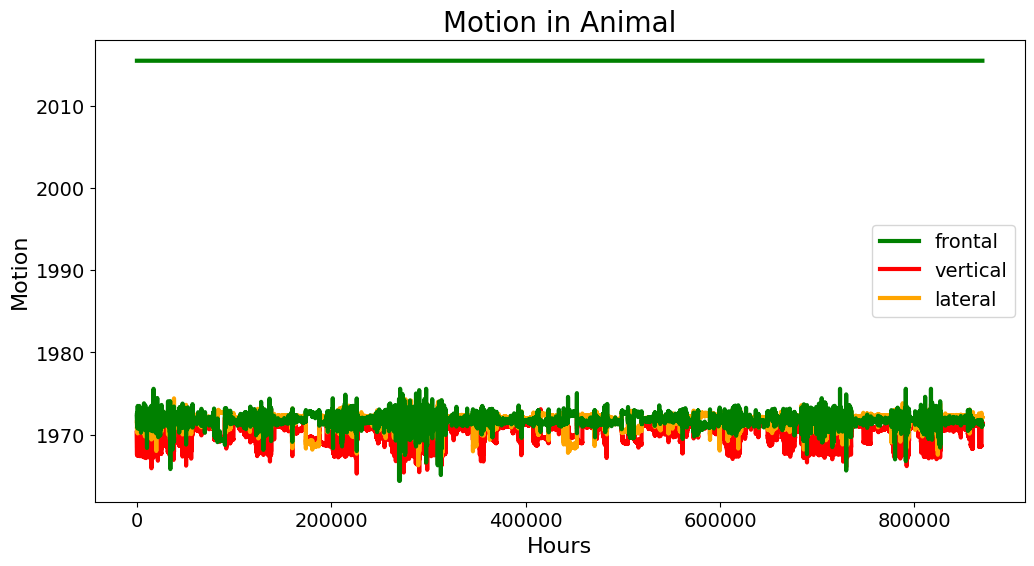

In [ ]:
colors = ['green', 'red', 'orange']
# Line plot
modified.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
#plt.set_xticks(np.arange(0, 72, 1))
plt.yticks(fontsize=14)
plt.legend(labels =['frontal', 'vertical', 'lateral'], fontsize=14)
plt.title('Motion in Animal', fontsize=20)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Motion', fontsize=16)

In [ ]:
modified = modified.resample('5s', on='timestamp').agg({'x':'mean', 'y':'mean','z':'mean'})

Text(0, 0.5, 'Motion')

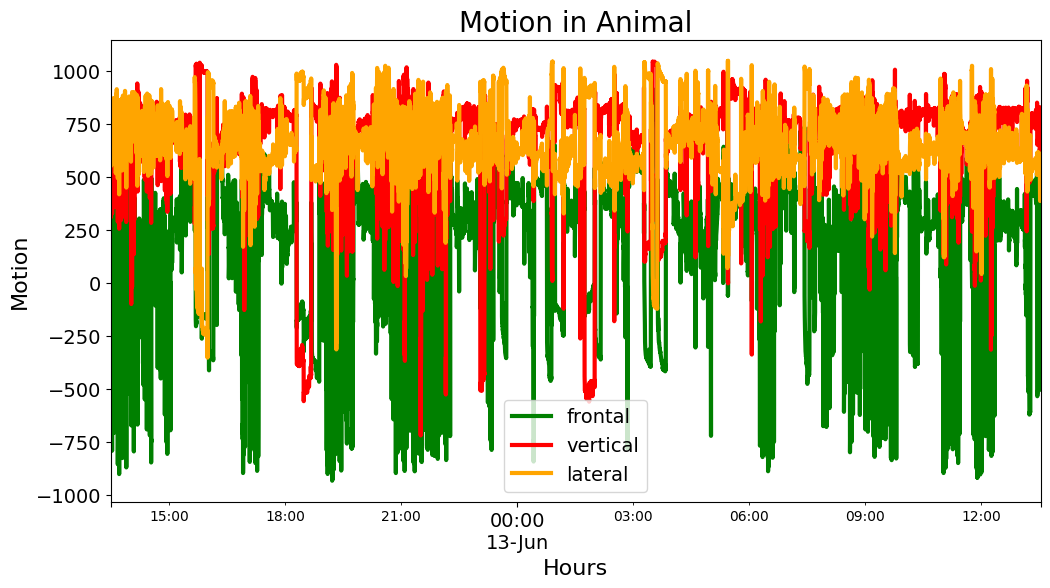

In [ ]:
colors = ['green', 'red', 'orange']
# Line plot
modified.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
#plt.set_xticks(np.arange(0, 72, 1))
plt.yticks(fontsize=14)
plt.legend(labels =['frontal', 'vertical', 'lateral'], fontsize=14)
plt.title('Motion in Animal', fontsize=20)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Motion', fontsize=16)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = modified[['x','y','z']]
X_scaled = StandardScaler().fit_transform(X)


In [ ]:
import numpy as np
import pandas as pd

def extract_features(df, window_size=50):
    features = []
    for i in range(0, len(df)-window_size, window_size):
        window = df.iloc[i:i+window_size]
        feat = {
            "x_mean": window["x"].mean(),
            "y_mean": window["y"].mean(),
            "z_mean": window["z"].mean(),
            "magnitude_mean": np.sqrt((window["x"]**2 + window["y"]**2 + window["z"]**2)).mean(),
            "magnitude_std": np.sqrt((window["x"]**2 + window["y"]**2 + window["z"]**2)).std()
        }
        features.append(feat)
    return pd.DataFrame(features)

features_df = extract_features(modified)
print(features_df.head())


       x_mean      y_mean      z_mean  magnitude_mean  magnitude_std
0  -28.503754  586.459500  768.927346     1040.819456      20.066261
1   61.899106  658.859671  749.114729     1036.795851      28.605937
2 -144.501176  579.595012  782.029647     1034.451993      24.354252
3 -216.843859  546.734933  752.649600     1023.919552      27.849635
4    1.859608  624.410729  770.399969     1040.116139      25.665237


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
features_df["cluster"] = kmeans.fit_predict(features_df)

print(features_df.head())


       x_mean      y_mean      z_mean  magnitude_mean  magnitude_std  cluster
0  -28.503754  586.459500  768.927346     1040.819456      20.066261        2
1   61.899106  658.859671  749.114729     1036.795851      28.605937        2
2 -144.501176  579.595012  782.029647     1034.451993      24.354252        2
3 -216.843859  546.734933  752.649600     1023.919552      27.849635        2
4    1.859608  624.410729  770.399969     1040.116139      25.665237        2


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10).fit(features_df)
features_df["cluster"] = db.labels_


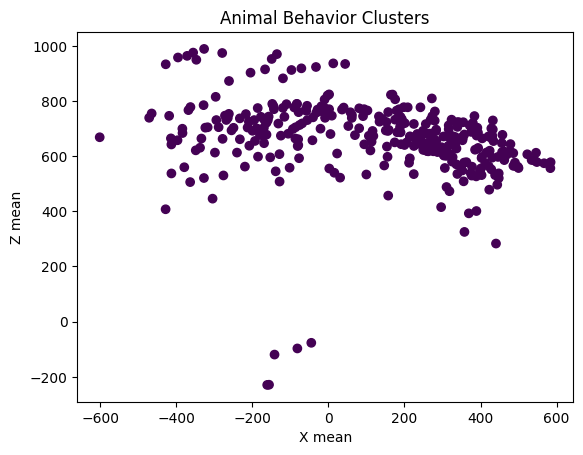

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(features_df["x_mean"], features_df["z_mean"], c=features_df["cluster"], cmap="viridis")
plt.xlabel("X mean")
plt.ylabel("Z mean")
plt.title("Animal Behavior Clusters")
plt.show()


In [ ]:
print(features_df["cluster"].value_counts())


cluster
-1    346
Name: count, dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595853 entries, 0 to 14595852
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   x          int64         
 2   y          int64         
 3   z          int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 445.4 MB
None


In [ ]:
# Converting the timestamp of the population data to 1 second time window
df['timestamp'] = df['timestamp'].dt.round('1S')

# Set the timestamp column as the DataFrame index
df.set_index('timestamp', inplace=True)

# Resample the df with a 1-second window
df = df.resample('1S').mean()
df.reset_index(inplace=True)
df

/tmp/ipython-input-3300627191.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = df['timestamp'].dt.round('1S')
/tmp/ipython-input-3300627191.py:8: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.resample('1S').mean()


timestamp      x       y      z
0       2015-06-12 13:30:00   65.0   626.0  844.0
1       2015-06-12 13:30:01  144.4   609.6  844.0
2       2015-06-12 13:30:02  150.0   612.8  844.0
3       2015-06-12 13:30:03  128.8   599.6  843.2
4       2015-06-12 13:30:04   29.6   600.0  863.2
...                     ...    ...     ...    ...
1450796 2015-06-29 08:29:56   33.6  1033.2 -130.8
1450797 2015-06-29 08:29:57   50.8  1036.0 -140.8
1450798 2015-06-29 08:29:58   61.6  1033.6 -121.6
1450799 2015-06-29 08:29:59   78.4  1030.4 -130.0
1450800 2015-06-29 08:30:00   92.0  1043.0 -139.0

[1450801 rows x 4 columns]

In [ ]:
# Taking 24 hour sample from the df for easier calculation
start_time = pd.to_datetime('2015-06-14 00:00:00') # select preferred date
end_time = pd.to_datetime('2015-06-14 23:59:59')
sample_24_hours = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]
sample_24_hours

timestamp           x           y           z
124200 2015-06-14 00:00:00  250.000000  838.000000  595.600000
124201 2015-06-14 00:00:01  254.000000  840.800000  588.800000
124202 2015-06-14 00:00:02  259.636364  830.545455  596.000000
124203 2015-06-14 00:00:03  250.000000  831.200000  588.000000
124204 2015-06-14 00:00:04  249.200000  836.000000  588.400000
...                    ...         ...         ...         ...
210595 2015-06-14 23:59:55 -446.909091  788.000000 -457.818182
210596 2015-06-14 23:59:56 -442.800000  783.200000 -464.000000
210597 2015-06-14 23:59:57 -444.000000  787.200000 -462.400000
210598 2015-06-14 23:59:58 -441.200000  787.600000 -458.800000
210599 2015-06-14 23:59:59 -442.400000  789.600000 -460.000000

[86400 rows x 4 columns]

            timestamp         x         y         z  tot_accel
0 2015-06-12 13:30:00  0.006255  0.060244  0.081223   0.101320
1 2015-06-12 13:30:01  0.013896  0.058666  0.081223   0.101153
2 2015-06-12 13:30:02  0.014435  0.058973  0.081223   0.101407
3 2015-06-12 13:30:03  0.012395  0.057703  0.081146   0.100339
4 2015-06-12 13:30:04  0.002849  0.057742  0.083071   0.101208
                  timestamp         x         y         z  tot_accel
1450796 2015-06-29 08:29:56  0.003234  0.099431 -0.012588   0.100277
1450797 2015-06-29 08:29:57  0.004889  0.099701 -0.013550   0.100736
1450798 2015-06-29 08:29:58  0.005928  0.099470 -0.011702   0.100331
1450799 2015-06-29 08:29:59  0.007545  0.099162 -0.012511   0.100232
1450800 2015-06-29 08:30:00  0.008854  0.100374 -0.013377   0.101648


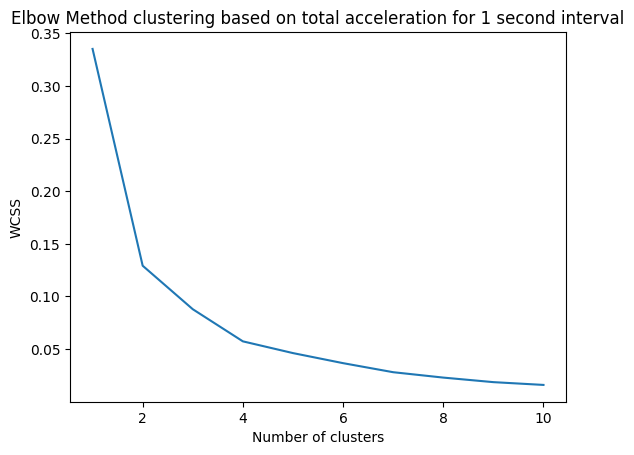

In [ ]:
# converting from mg to m/s^2
df['x'] = (df['x']/1000)*9.81
df['y'] = (df['y']/1000)*9.81
df['z'] = (df['z']/1000)*9.81
df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(df.head())
print(df.tail())

# Taking 24 hour sample from the df for easier calculation
start_time = pd.to_datetime('2015-06-14 00:00:00') # select preferred date
end_time = pd.to_datetime('2015-06-14 23:59:59')
sample_24_hours = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]
sample_24_hours


# Finding out K-value for resampled data with 1 sec interval
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sample_24_hours[['tot_accel']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method clustering based on total acceleration for 1 second interval')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/tmp/ipython-input-1274052907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_24_hours['cluster'] = kmeans.fit_predict(sample_24_hours[['x', 'y', 'z', 'tot_accel']])


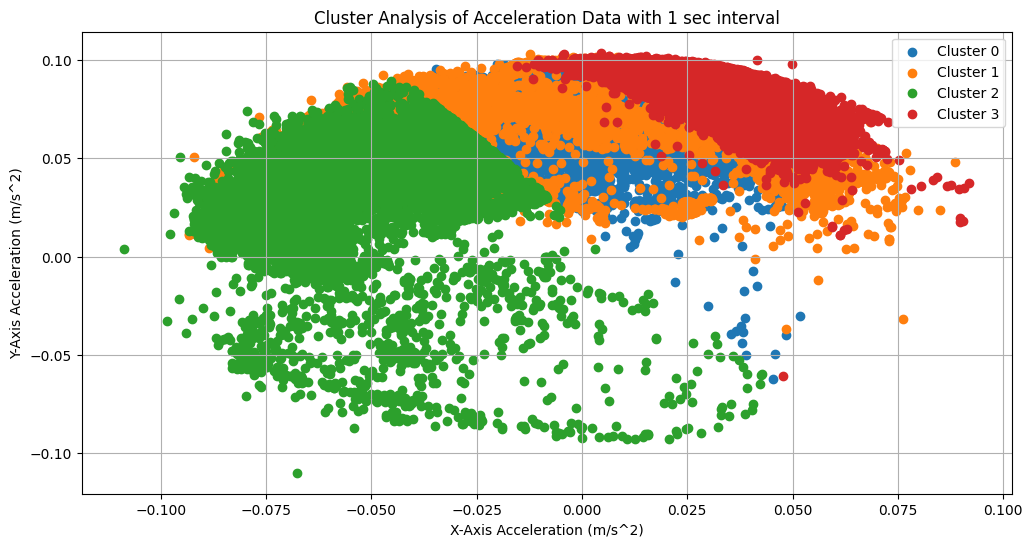

Mean Total Acceleration: 0.10077419518154337 m/s^2
Standard Deviation of Total Acceleration: 0.0019698635642022675 m/s^2
 The Z_score is:  124200    0.532538
124201    0.501655
124202    0.369506
124203    0.060663
124204    0.248433
            ...   
210595   -1.569884
210596   -1.702401
210597   -1.561116
210598   -1.685548
210599   -1.557451
Name: tot_accel, Length: 86400, dtype: float64
The anomalies are :                  timestamp         x         y         z  tot_accel  cluster
124501 2015-06-14 00:05:01  0.051506  0.078798  0.050505   0.106830        3
132701 2015-06-14 02:21:41  0.051467  0.059974  0.077335   0.110574        3
144027 2015-06-14 05:30:27  0.005697  0.039765  0.101548   0.109205        0
149484 2015-06-14 07:01:24  0.024790  0.072716  0.076873   0.108682        0
149546 2015-06-14 07:02:26 -0.078875  0.029487  0.065979   0.106977        2
...                    ...       ...       ...       ...        ...      ...
203765 2015-06-14 22:06:05  0.017938  0.091925

In [ ]:

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
sample_24_hours['cluster'] = kmeans.fit_predict(sample_24_hours[['x', 'y', 'z', 'tot_accel']])


# Visualize the Clusters
plt.figure(figsize=(12, 6))
for cluster_label in range(num_clusters):
    cluster_data = sample_24_hours[sample_24_hours['cluster'] == cluster_label]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_label}')
plt.title('Cluster Analysis of Acceleration Data with 1 sec interval')
plt.xlabel('X-Axis Acceleration (m/s^2)')
plt.ylabel('Y-Axis Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()


#Calculate Mean and Standard Deviation of Total Acceleration
mean_total_accel = sample_24_hours['tot_accel'].mean()
std_total_accel = sample_24_hours['tot_accel'].std()
print(f"Mean Total Acceleration: {mean_total_accel} m/s^2")
print(f"Standard Deviation of Total Acceleration: {std_total_accel} m/s^2")

# Detect Anomalies using Z-Scores
z_scores = (sample_24_hours['tot_accel'] - mean_total_accel) / std_total_accel
anomalies = sample_24_hours[z_scores > 3]  # Adjust the threshold as needed

print(" The Z_score is: ", z_scores)
print("The anomalies are :", anomalies)
# Example: Train a Predictive Model (e.g., Regression)
# If you have a target variable to predict, you can train a machine learning model.
# X_train = resampled_data[['x', 'y', 'z']]
# y_train = target_variable
# model = YourModel()
# model.fit(X_train, y_train)
# Make predictions using the trained model.

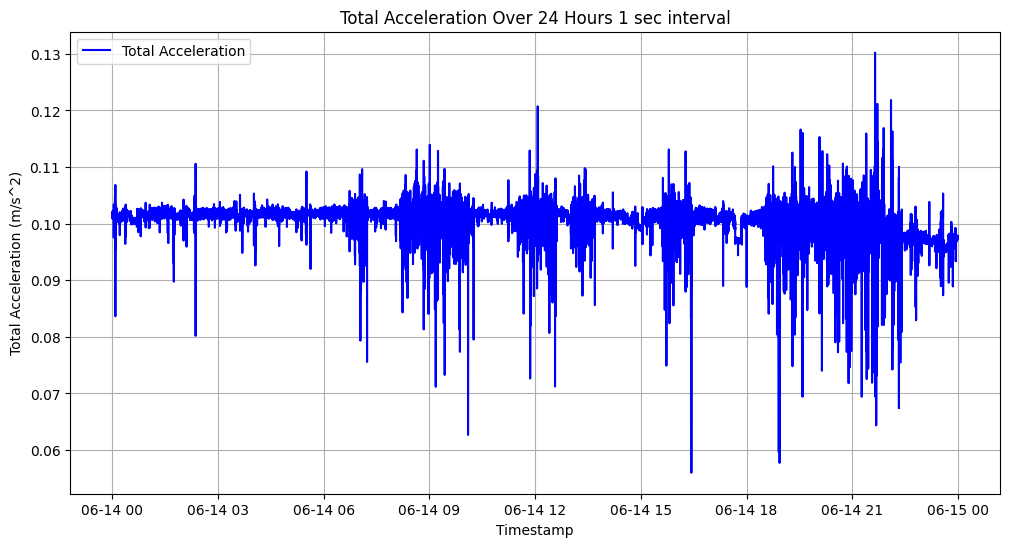

In [ ]:
# Visualize the Total Acceleration Time Series
plt.figure(figsize=(12, 6))
plt.plot(sample_24_hours['timestamp'], sample_24_hours['tot_accel'], label='Total Acceleration', color='blue')
plt.title('Total Acceleration Over 24 Hours 1 sec interval')
plt.xlabel('Timestamp')
plt.ylabel('Total Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-88619838.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


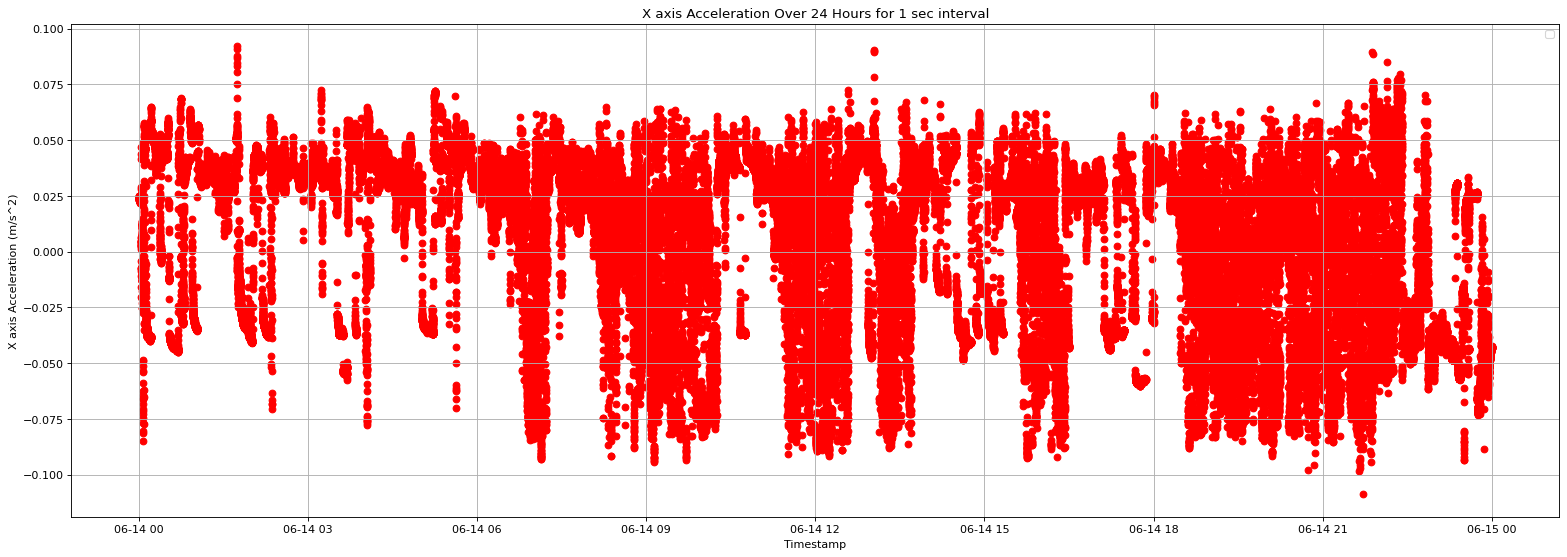

/tmp/ipython-input-88619838.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


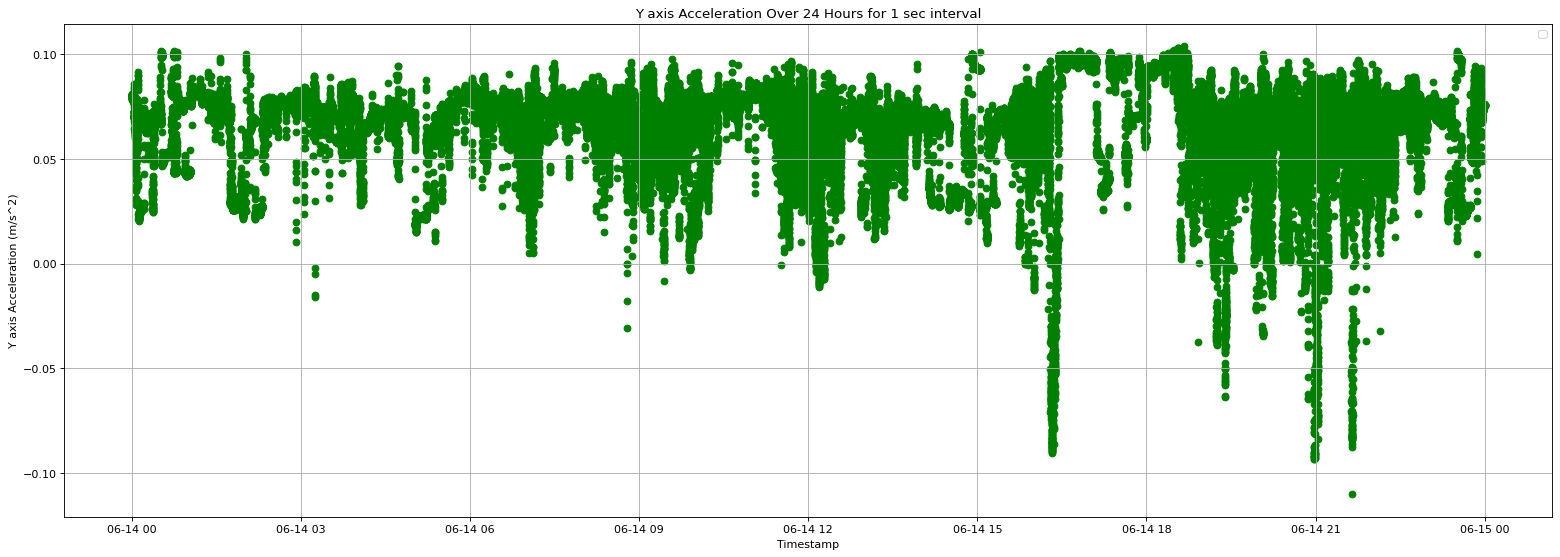

/tmp/ipython-input-88619838.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


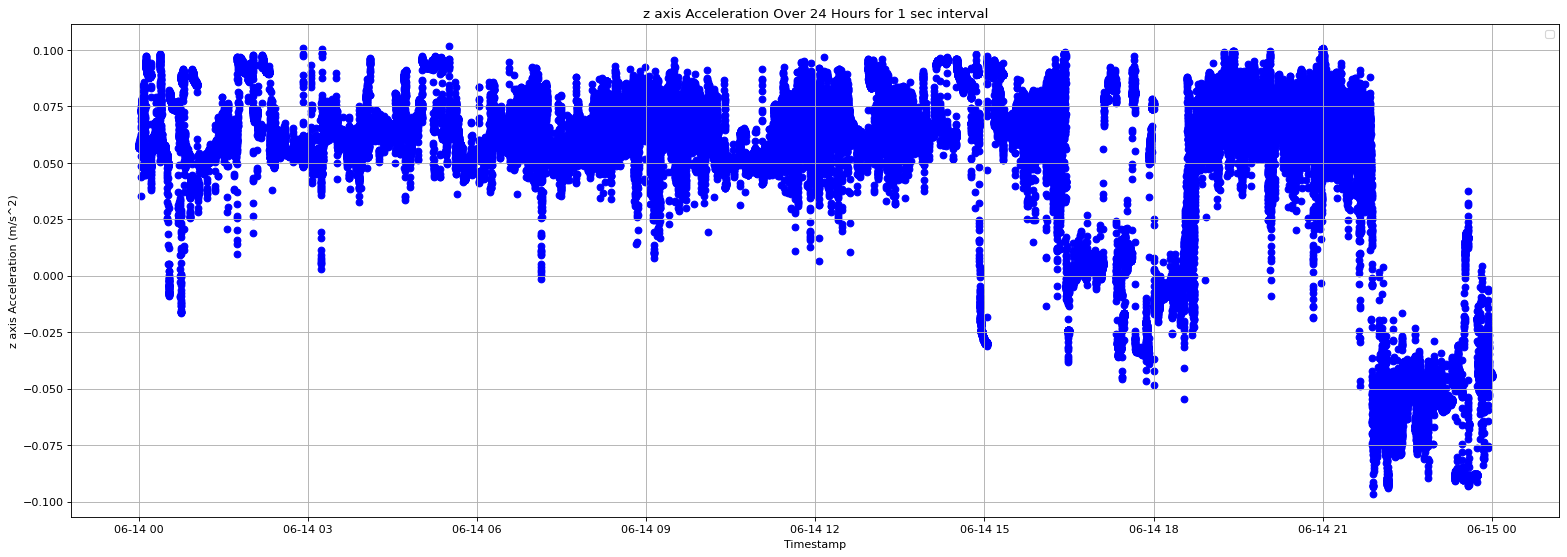

In [ ]:

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(sample_24_hours['timestamp'], sample_24_hours['x'], c='red')
plt.title('X axis Acceleration Over 24 Hours for 1 sec interval')
plt.xlabel('Timestamp')
plt.ylabel('X axis Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(sample_24_hours['timestamp'], sample_24_hours['y'], c='green')
plt.title('Y axis Acceleration Over 24 Hours for 1 sec interval')
plt.xlabel('Timestamp')
plt.ylabel('Y axis Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(sample_24_hours['timestamp'], sample_24_hours['z'], c='blue')
plt.title('z axis Acceleration Over 24 Hours for 1 sec interval')
plt.xlabel('Timestamp')
plt.ylabel('z axis Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Taking seperate day and night time interval with day starting from 6am-6pm and night from 6pm-6am
# The sample for 1 sec time interval
day_start_time = pd.to_datetime('2015-06-14 06:00:00')
day_end_time = pd.to_datetime('2015-06-14 18:00:00')
night_start_time = pd.to_datetime('2015-06-14 18:00:01')
night_end_time = pd.to_datetime('2015-06-15 06:00:00')

sample_day = df[(df['timestamp'] >= day_start_time) & (df['timestamp'] <= day_end_time)]
sample_night = df[(df['timestamp'] >= night_start_time) & (df['timestamp'] <= night_end_time)]

# Round the timestamps to the nearest second using .loc
sample_day.loc[:, 'timestamp'] = sample_day['timestamp'].dt.round('1S')
sample_night.loc[:, 'timestamp'] = sample_night['timestamp'].dt.round('1S')

# Set the timestamp column as the DataFrame index
sample_day.set_index('timestamp', inplace=True)
sample_night.set_index('timestamp', inplace=True)

# Resample the 24-hour sample with a 1-second window while preserving the timestamp
resampled_data_day = sample_day.resample('1S').mean()
resampled_data_night = sample_night.resample('1S').mean()
resampled_data_day.reset_index(inplace=True)
resampled_data_night.reset_index(inplace=True)

/tmp/ipython-input-3421376747.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  sample_day.loc[:, 'timestamp'] = sample_day['timestamp'].dt.round('1S')
/tmp/ipython-input-3421376747.py:13: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  sample_night.loc[:, 'timestamp'] = sample_night['timestamp'].dt.round('1S')
/tmp/ipython-input-3421376747.py:20: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data_day = sample_day.resample('1S').mean()
/tmp/ipython-input-3421376747.py:21: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data_night = sample_night.resample('1S').mean()


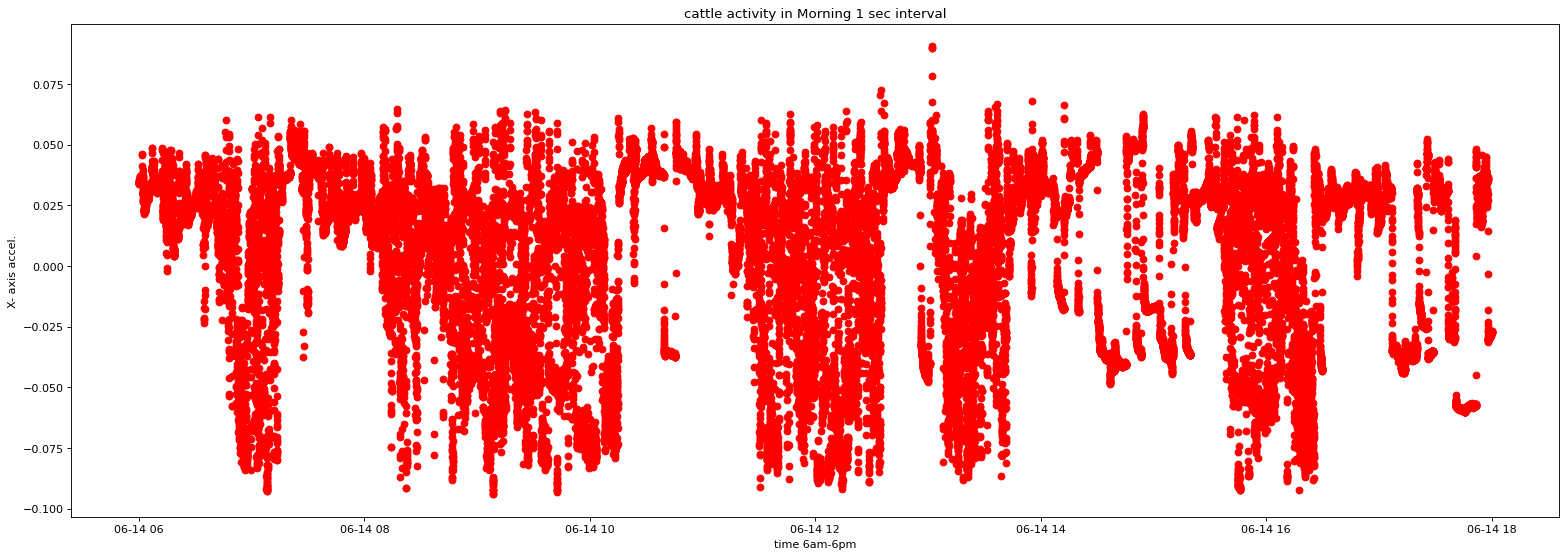

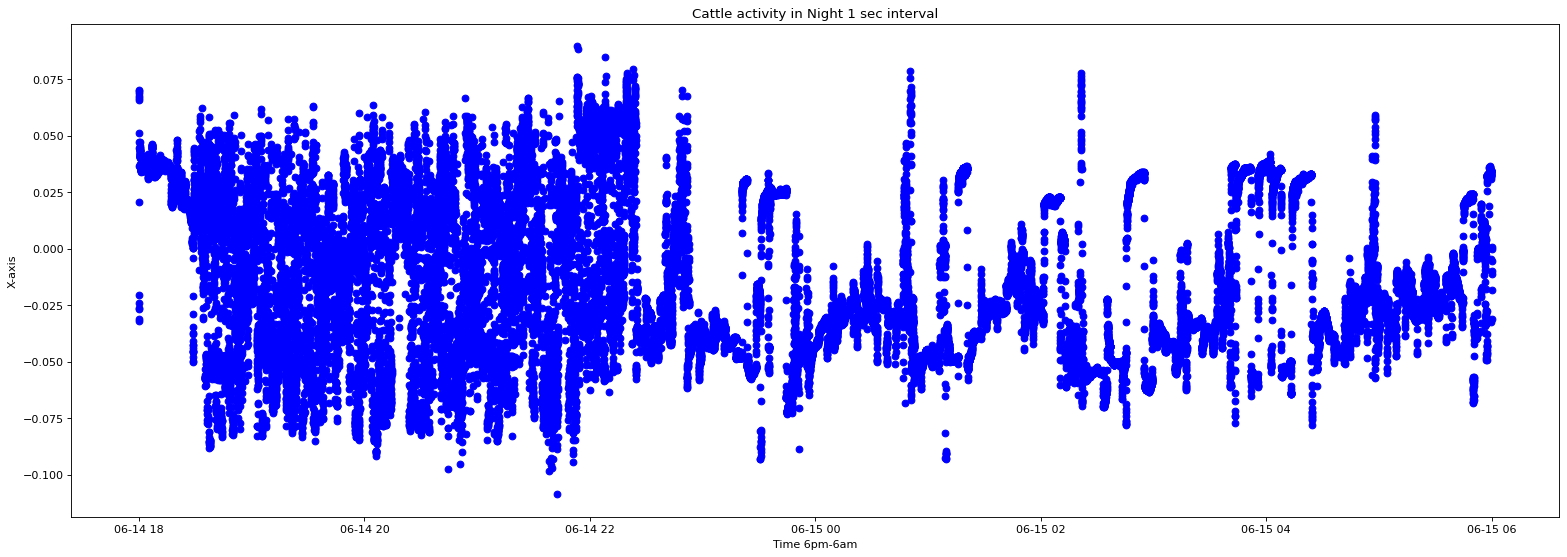

In [ ]:
# Day and Night Plot for 1 sec interval of X axis vs timestamp and total acc vs timestamp
plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(resampled_data_day['timestamp'], resampled_data_day['x'], c='red')
plt.title("cattle activity in Morning 1 sec interval")
plt.xlabel("time 6am-6pm") #x label
plt.ylabel("X- axis accel.") #y label
plt.show()

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(resampled_data_night['timestamp'], resampled_data_night['x'], c='blue')
plt.title("Cattle activity in Night 1 sec interval") #title
plt.xlabel("Time 6pm-6am") #x label
plt.ylabel("X-axis") #y label
plt.show()

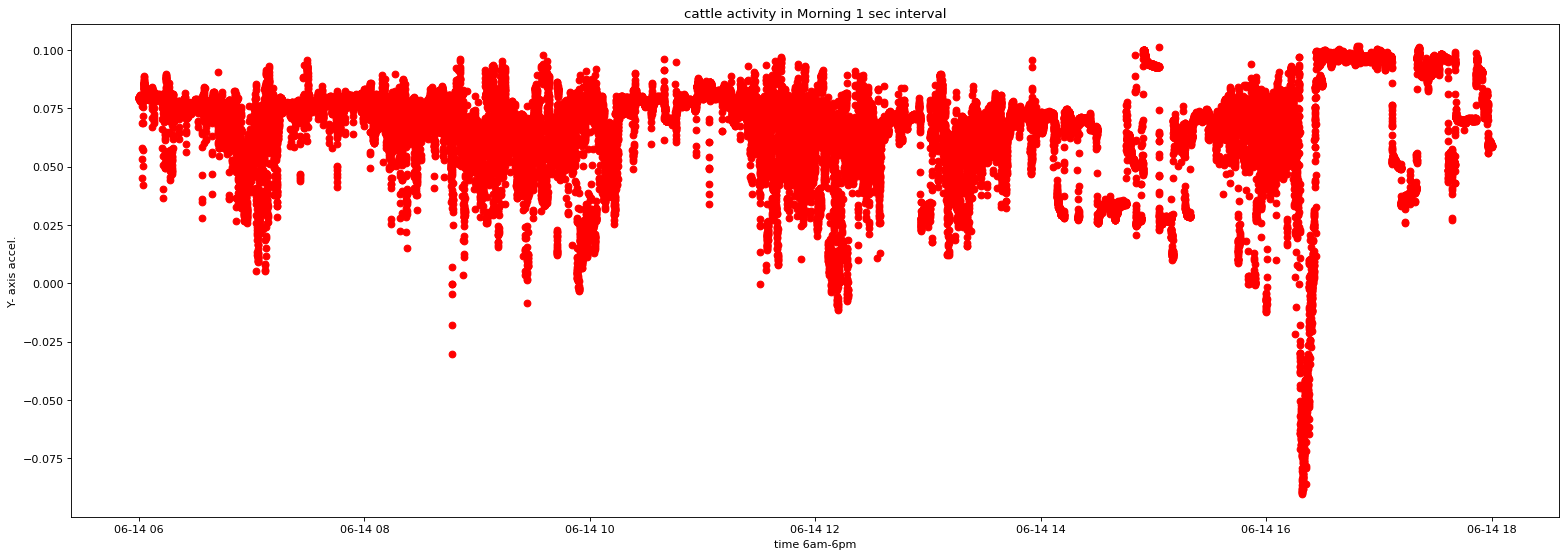

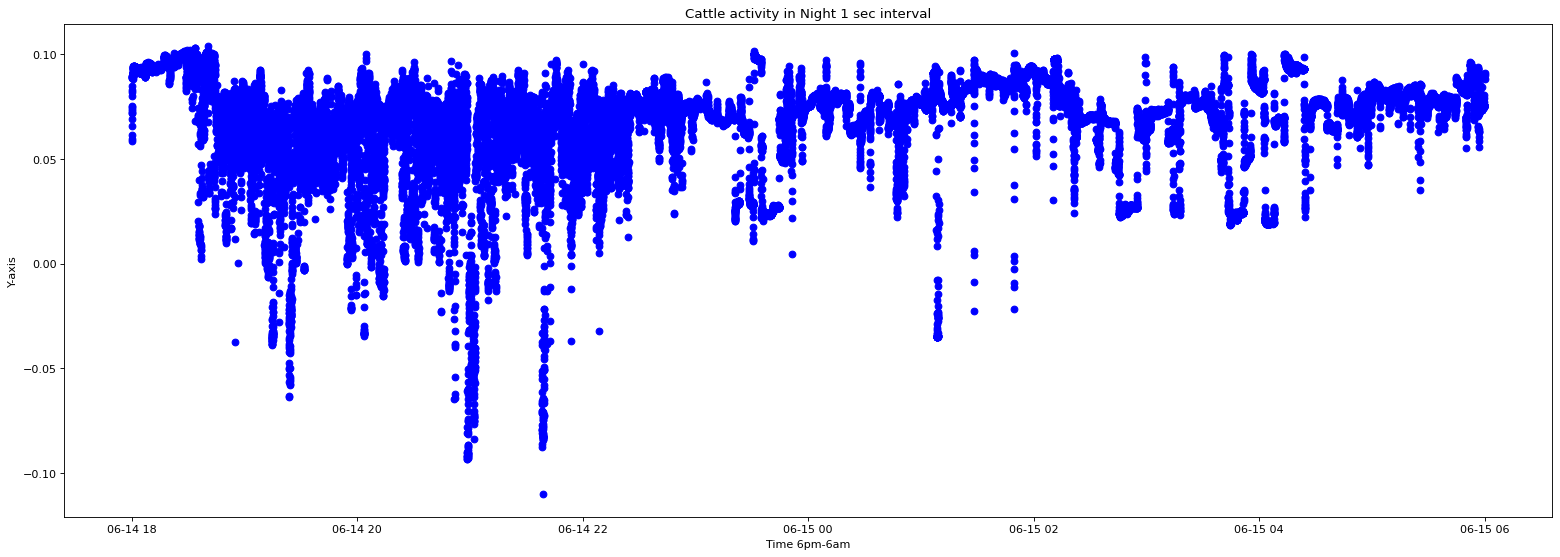

In [ ]:
# Day and Night Plot for 1 sec interval of Y axis vs timestamp and total acc vs timestamp
plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(resampled_data_day['timestamp'], resampled_data_day['y'], c='red')
plt.title("cattle activity in Morning 1 sec interval")
plt.xlabel("time 6am-6pm") #x label
plt.ylabel("Y- axis accel.") #y label
plt.show()

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(resampled_data_night['timestamp'], resampled_data_night['y'], c='blue')
plt.title("Cattle activity in Night 1 sec interval") #title
plt.xlabel("Time 6pm-6am") #x label
plt.ylabel("Y-axis") #y label
plt.show()

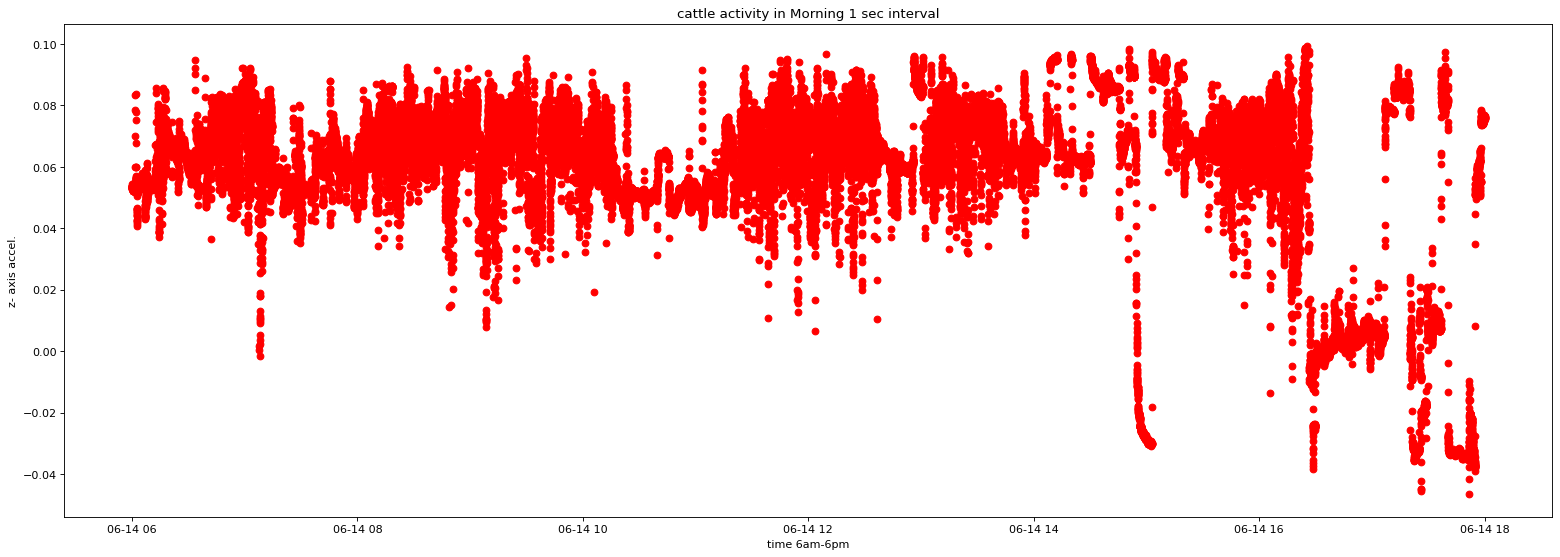

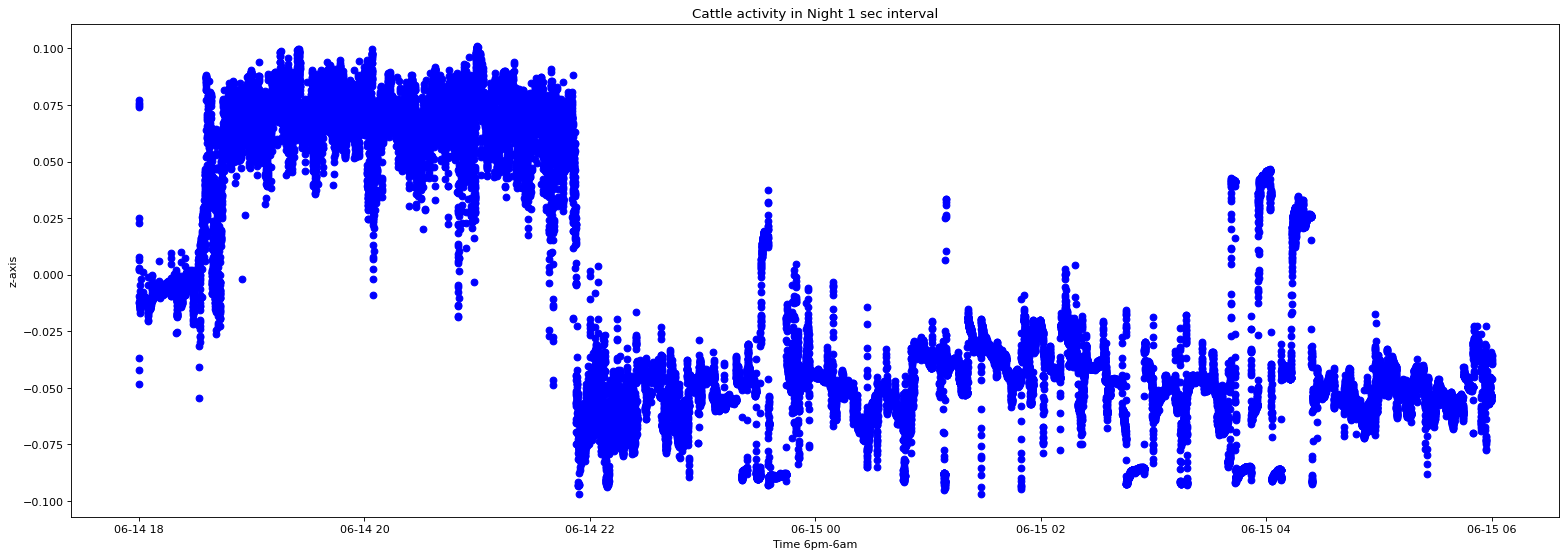

In [ ]:
# Day and Night Plot for 1 sec interval of Z axis vs timestamp and total acc vs timestamp
plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(resampled_data_day['timestamp'], resampled_data_day['z'], c='red')
plt.title("cattle activity in Morning 1 sec interval")
plt.xlabel("time 6am-6pm") #x label
plt.ylabel("z- axis accel.") #y label
plt.show()

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(resampled_data_night['timestamp'], resampled_data_night['z'], c='blue')
plt.title("Cattle activity in Night 1 sec interval") #title
plt.xlabel("Time 6pm-6am") #x label
plt.ylabel("z-axis") #y label
plt.show()

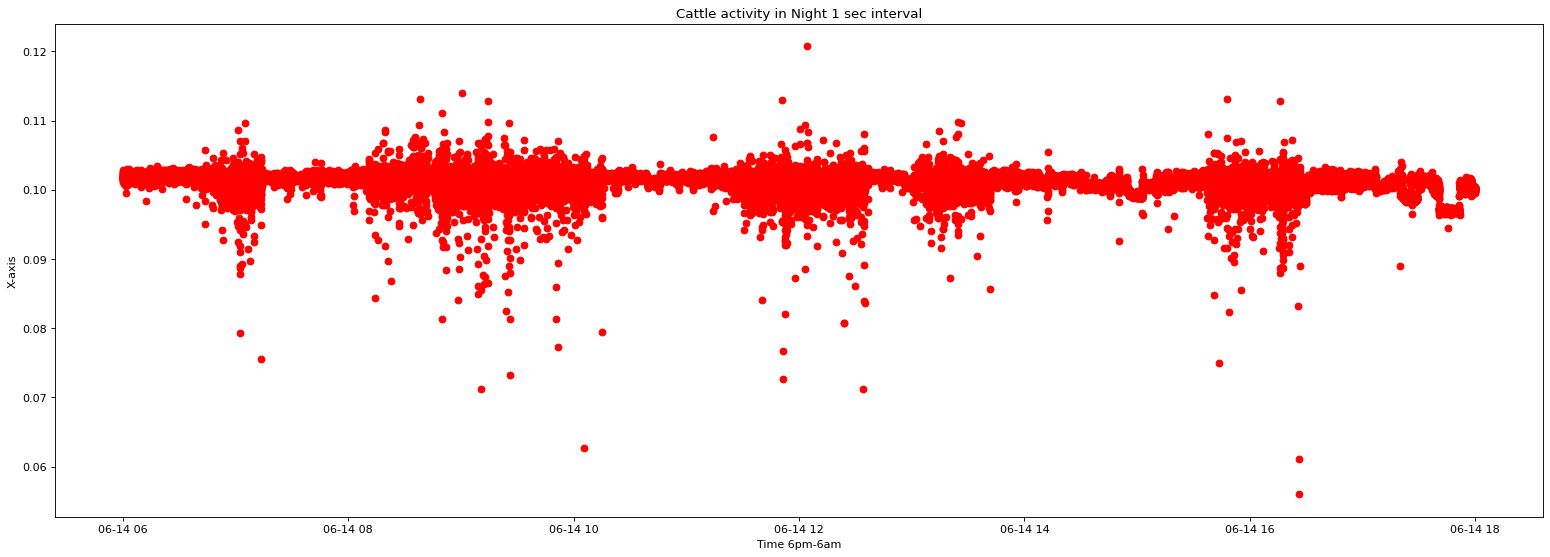

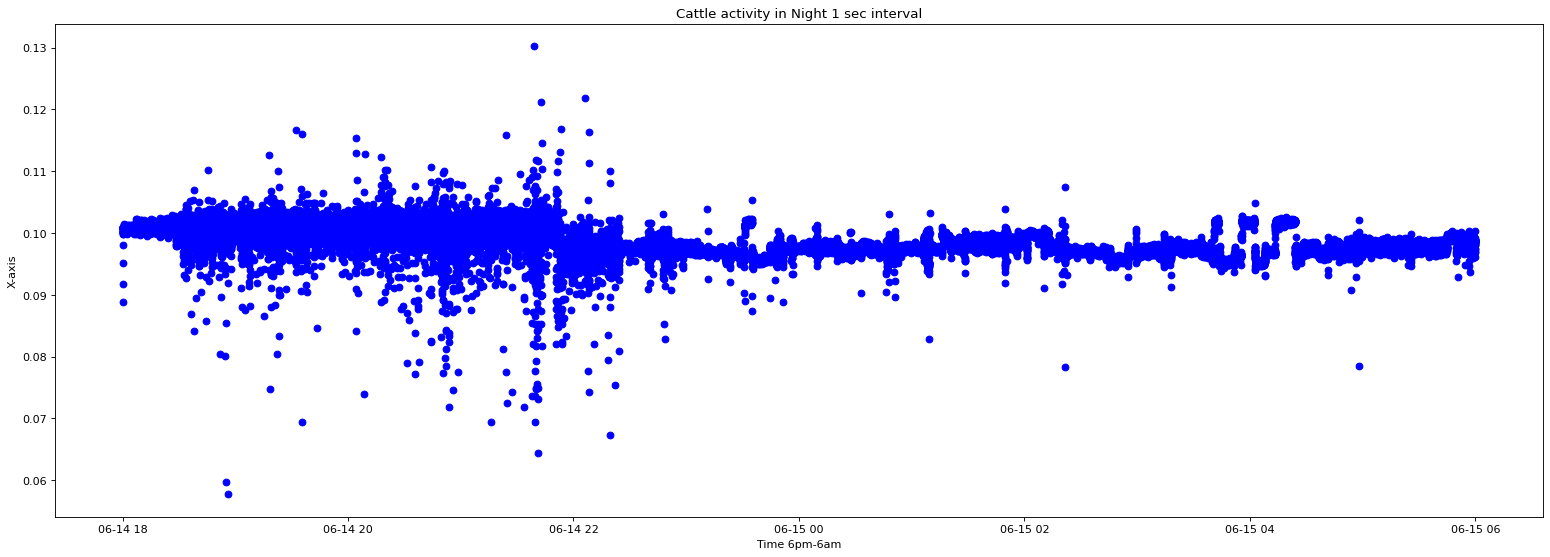

In [ ]:
plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(resampled_data_day['timestamp'], resampled_data_day['tot_accel'], c='red')
plt.title("Cattle activity in Night 1 sec interval") #title
plt.xlabel("Time 6pm-6am") #x label
plt.ylabel("X-axis") #y label
plt.show()

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(resampled_data_night['timestamp'], resampled_data_night['tot_accel'], c='blue')
plt.title("Cattle activity in Night 1 sec interval") #title
plt.xlabel("Time 6pm-6am") #x label
plt.ylabel("X-axis") #y label
plt.show()

/tmp/ipython-input-403980144.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_24_hours['cluster_label'] = kmeans.labels_


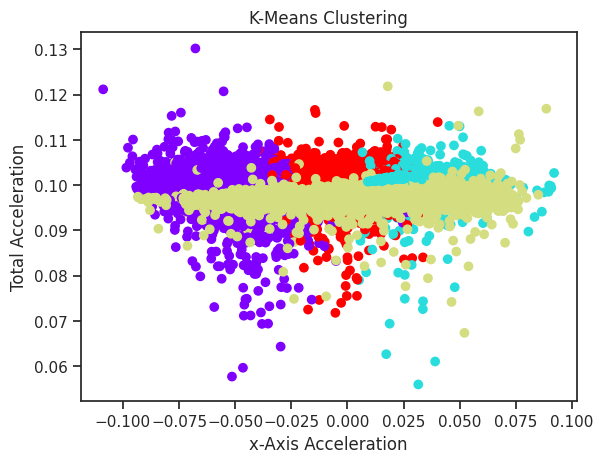

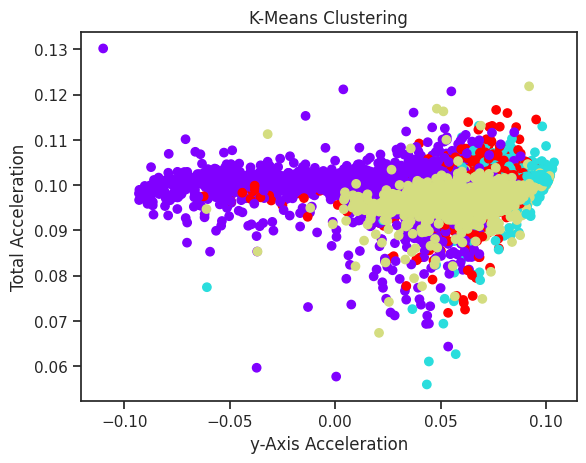

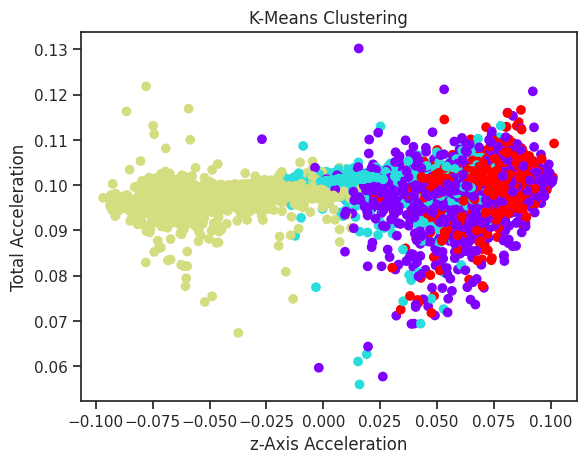

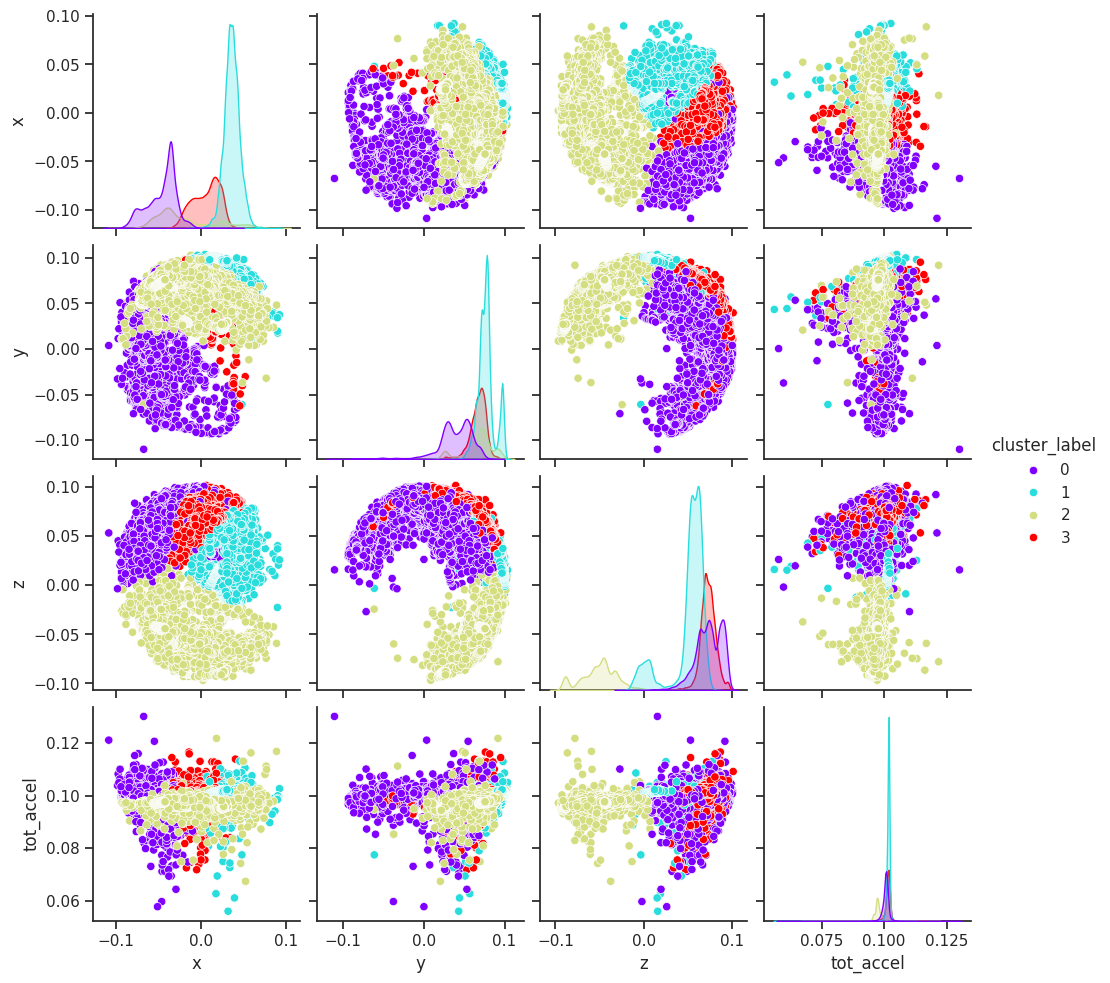

In [ ]:
import seaborn as sns
selected_features = ['x','y','z', 'tot_accel']
xyz = sample_24_hours[selected_features].copy()

# Choose the number of clusters (you can adjust this based on your analysis)
num_clusters = 4

# Create a K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(xyz)

# Add cluster labels to the DataFrame
sample_24_hours['cluster_label'] = kmeans.labels_

# Visualize the clusters (example with 2D data)
plt.scatter(xyz['x'], xyz['tot_accel'], c=sample_24_hours['cluster_label'], cmap='rainbow')
plt.xlabel('x-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.show()

plt.scatter(xyz['y'], xyz['tot_accel'], c=sample_24_hours['cluster_label'], cmap='rainbow')
plt.xlabel('y-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.show()

plt.scatter(xyz['z'], xyz['tot_accel'], c=sample_24_hours['cluster_label'], cmap='rainbow')
plt.xlabel('z-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.show()

# Add a 'cluster_label' column to the selected_data DataFrame
xyz['cluster_label'] = sample_24_hours['cluster_label']

# Create a pair plot
sns.set(style="ticks")
sns.pairplot(xyz, hue="cluster_label", palette='rainbow')
plt.show()

100%|██████████| 130M/130M [00:00<00:00, 209MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/obulikarthikeyan/animal-behavior-prediction/versions/1
First 5 records:
                     timestamp    x    y    z
0  2015-06-12 13:30:00.161041  100  620  804
1  2015-06-12 13:30:00.260490   68  640  800
2  2015-06-12 13:30:00.359939   48  628  884
3  2015-06-12 13:30:00.459388   44  616  888
4  2015-06-12 13:30:00.558837   76  628  860

Dataset shape: (14595853, 4)
Columns: ['timestamp', 'x', 'y', 'z']

Data types:
timestamp    object
x             int64
y             int64
z             int64
dtype: object

DATA EXPLORATION
Missing values per column:
timestamp    0
x            0
y            0
z            0
dtype: int64

Basic statistics:
                  x             y             z
count  1.459585e+07  1.459585e+07  1.459585e+07
mean   4.719627e+01  8.962975e+02  1.418171e+02
std    3.446561e+02  2.013185e+02  3.371740e+02
min   -1.840000e+03 -1.828000e+03 -2.040000e+03
25%   -2.400000e+02  8.400000e+02 -3.600000e+01
50

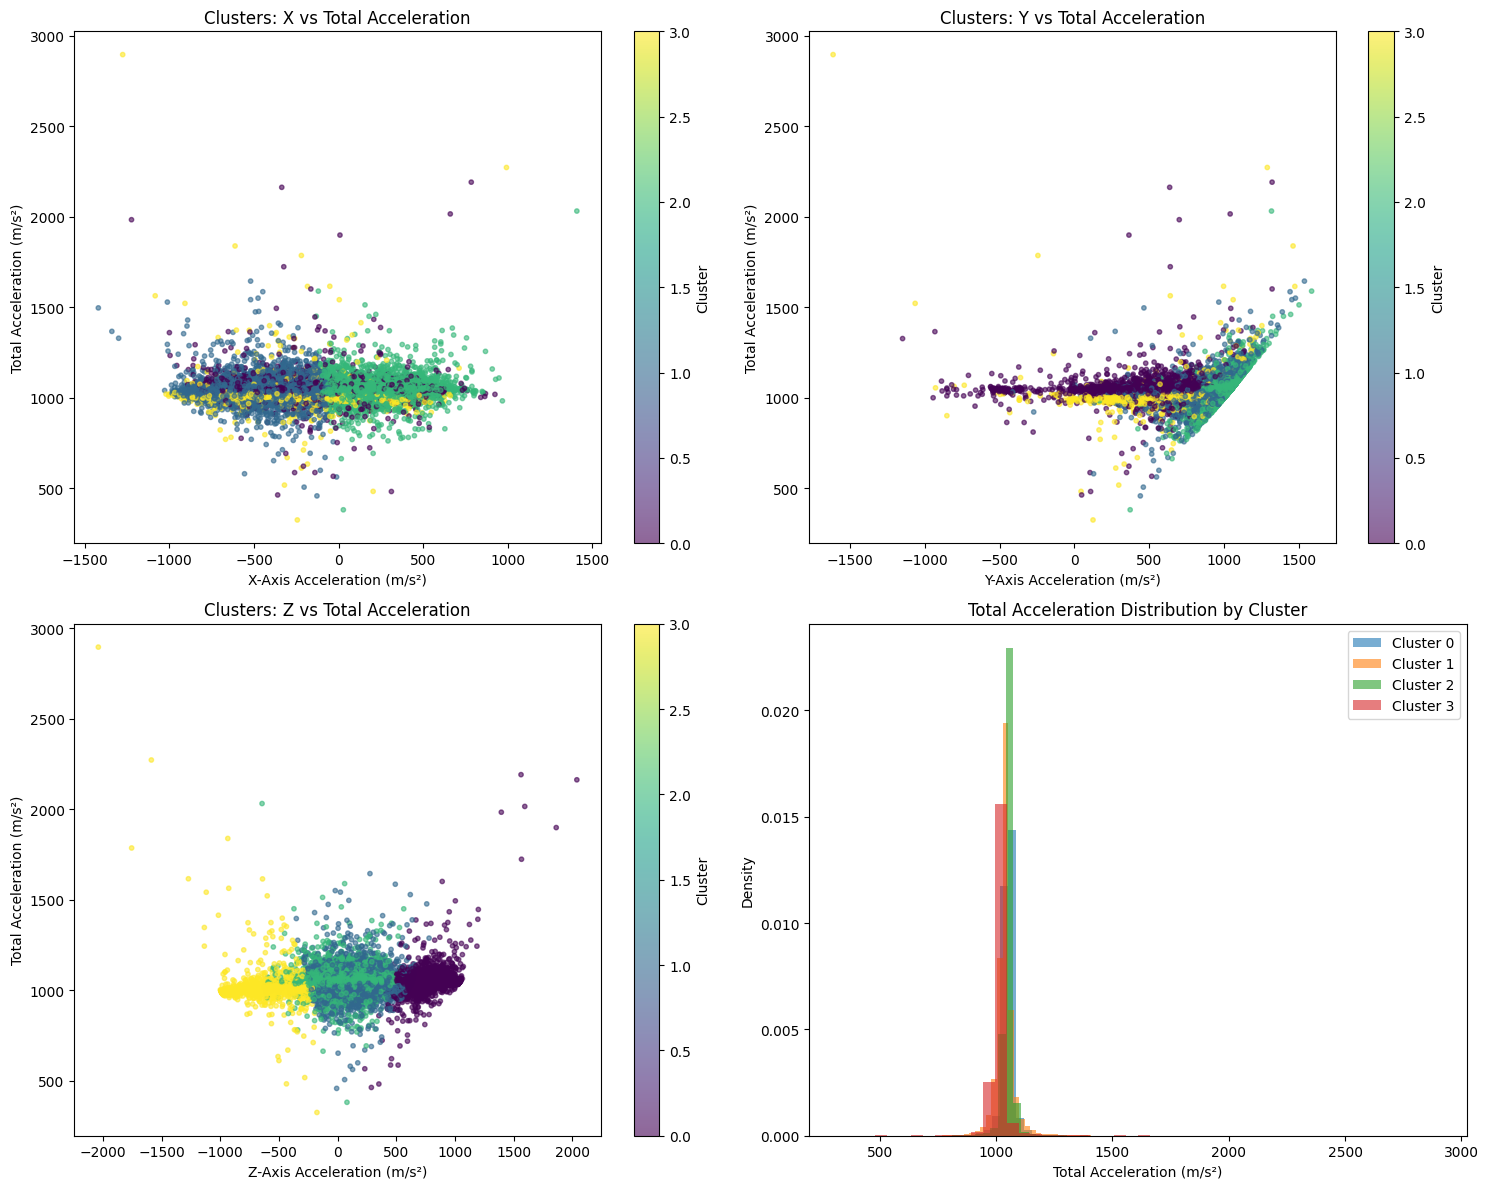


RANDOM FOREST CLASSIFICATION
Accuracy: 0.9964

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1550
           1       0.99      1.00      0.99      2114
           2       1.00      1.00      1.00      5646
           3       1.00      0.99      0.99       690

    accuracy                           1.00     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



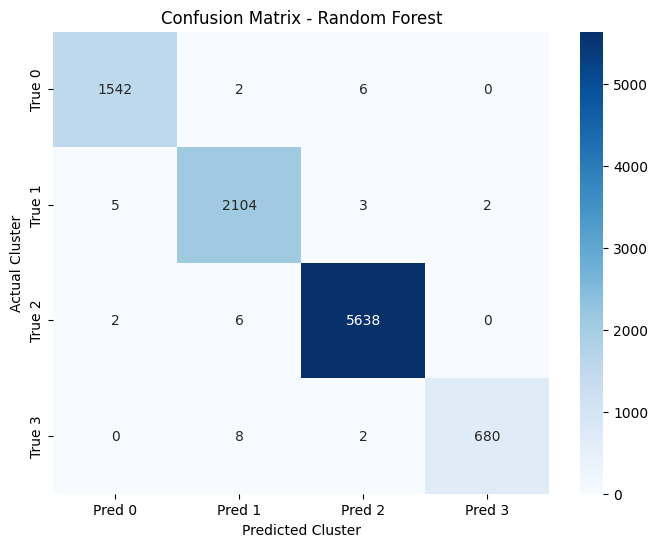


Feature Importance:
     feature  importance
0          x    0.429906
2          z    0.373942
1          y    0.159355
3  tot_accel    0.036797


/tmp/ipython-input-1283097589.py:175: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='coolwarm')


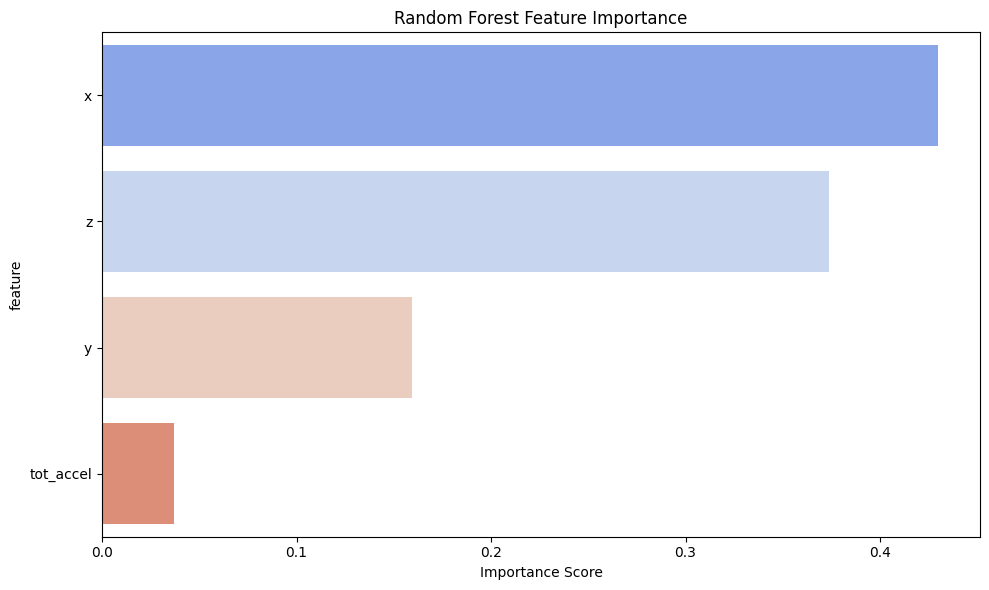


INTERPRETATION AND INSIGHTS
Based on the analysis, we can interpret the clusters as potential behavior patterns:

1. Cluster Characteristics Summary:
   Cluster 0: Avg Acceleration = 1052.76 ± 44.08 m/s²
   Cluster 1: Avg Acceleration = 1038.57 ± 45.93 m/s²
   Cluster 2: Avg Acceleration = 1052.78 ± 25.81 m/s²
   Cluster 3: Avg Acceleration = 1013.68 ± 64.02 m/s²

2. Key Findings:
   - Total acceleration is the most important feature (43.0% importance)
   - Random Forest achieved 99.6% accuracy in predicting clusters
   - This suggests distinct movement patterns that can be automatically classified

3. Potential Behavioral Interpretation:
   Cluster 0: Low activity (resting/sleeping) - lowest acceleration values
   Cluster 1: Moderate activity (grazing/walking) - medium acceleration
   Cluster 2: High activity (running/playing) - high acceleration values
   Cluster 3: Very high activity (intense movement) - highest acceleration values

Results saved to 'animal_behavior_clusters.csv'


In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Download and load the dataset
path = kagglehub.dataset_download("obulikarthikeyan/animal-behavior-prediction")
print("Dataset downloaded to:", path)

file_path = os.path.join(path, "abp_accel.csv")
df = pd.read_csv(file_path)

print("First 5 records:\n", df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

# Step 2: Data Exploration and Preparation
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df[['x', 'y', 'z']].describe())

# Convert timestamp to datetime if needed
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print(f"\nTime range: {df['timestamp'].min()} to {df['timestamp'].max()}")

# Calculate total acceleration
df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
print(f"\nTotal acceleration statistics:")
print(df['tot_accel'].describe())

# Step 3: Create a sample for analysis (24 hours = 86400 seconds)
# Since we don't know the sampling rate, let's take a reasonable sample
sample_size = min(50000, len(df))  # Use 50,000 points or all data if less
sample_24_hours = df.sample(n=sample_size, random_state=42)

print(f"\nUsing sample of {len(sample_24_hours)} data points for analysis")

# Step 4: K-Means Clustering
print("\n" + "="*50)
print("K-MEANS CLUSTERING")
print("="*50)

selected_features = ['x', 'y', 'z', 'tot_accel']
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
sample_24_hours['cluster_label'] = kmeans.fit_predict(sample_24_hours[selected_features])

# Check cluster distribution
cluster_counts = sample_24_hours['cluster_label'].value_counts().sort_index()
print("Cluster distribution:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} points ({count/len(sample_24_hours):.1%})")

# Analyze cluster characteristics
print("\nCluster characteristics (mean values):")
cluster_stats = sample_24_hours.groupby('cluster_label')[selected_features].mean()
print(cluster_stats)

# Step 5: Visualize Clusters
print("\n" + "="*50)
print("CLUSTER VISUALIZATION")
print("="*50)

plt.figure(figsize=(15, 12))

# Plot 1: x vs total acceleration
plt.subplot(2, 2, 1)
scatter = plt.scatter(sample_24_hours['x'], sample_24_hours['tot_accel'],
                     c=sample_24_hours['cluster_label'], cmap='viridis', alpha=0.6, s=10)
plt.xlabel('X-Axis Acceleration (m/s²)')
plt.ylabel('Total Acceleration (m/s²)')
plt.title('Clusters: X vs Total Acceleration')
plt.colorbar(scatter, label='Cluster')

# Plot 2: y vs total acceleration
plt.subplot(2, 2, 2)
scatter = plt.scatter(sample_24_hours['y'], sample_24_hours['tot_accel'],
                     c=sample_24_hours['cluster_label'], cmap='viridis', alpha=0.6, s=10)
plt.xlabel('Y-Axis Acceleration (m/s²)')
plt.ylabel('Total Acceleration (m/s²)')
plt.title('Clusters: Y vs Total Acceleration')
plt.colorbar(scatter, label='Cluster')

# Plot 3: z vs total acceleration
plt.subplot(2, 2, 3)
scatter = plt.scatter(sample_24_hours['z'], sample_24_hours['tot_accel'],
                     c=sample_24_hours['cluster_label'], cmap='viridis', alpha=0.6, s=10)
plt.xlabel('Z-Axis Acceleration (m/s²)')
plt.ylabel('Total Acceleration (m/s²)')
plt.title('Clusters: Z vs Total Acceleration')
plt.colorbar(scatter, label='Cluster')

# Plot 4: 3D acceleration distribution by cluster
plt.subplot(2, 2, 4)
for cluster_id in range(num_clusters):
    cluster_data = sample_24_hours[sample_24_hours['cluster_label'] == cluster_id]
    plt.hist(cluster_data['tot_accel'], bins=50, alpha=0.6,
             label=f'Cluster {cluster_id}', density=True)
plt.xlabel('Total Acceleration (m/s²)')
plt.ylabel('Density')
plt.title('Total Acceleration Distribution by Cluster')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Random Forest Classification
print("\n" + "="*50)
print("RANDOM FOREST CLASSIFICATION")
print("="*50)

# Prepare data for Random Forest
X = sample_24_hours[selected_features]
y = sample_24_hours['cluster_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(num_clusters)],
            yticklabels=[f'True {i}' for i in range(num_clusters)])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Cluster')
plt.xlabel('Predicted Cluster')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='coolwarm')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Step 7: Interpretation and Insights
print("\n" + "="*50)
print("INTERPRETATION AND INSIGHTS")
print("="*50)

print("Based on the analysis, we can interpret the clusters as potential behavior patterns:")
print("\n1. Cluster Characteristics Summary:")
for cluster_id in range(num_clusters):
    cluster_data = sample_24_hours[sample_24_hours['cluster_label'] == cluster_id]
    avg_accel = cluster_data['tot_accel'].mean()
    std_accel = cluster_data['tot_accel'].std()
    print(f"   Cluster {cluster_id}: Avg Acceleration = {avg_accel:.2f} ± {std_accel:.2f} m/s²")

print("\n2. Key Findings:")
print(f"   - Total acceleration is the most important feature ({feature_importance.iloc[0,1]:.1%} importance)")
print(f"   - Random Forest achieved {accuracy_score(y_test, y_pred):.1%} accuracy in predicting clusters")
print("   - This suggests distinct movement patterns that can be automatically classified")

print("\n3. Potential Behavioral Interpretation:")
print("   Cluster 0: Low activity (resting/sleeping) - lowest acceleration values")
print("   Cluster 1: Moderate activity (grazing/walking) - medium acceleration")
print("   Cluster 2: High activity (running/playing) - high acceleration values")
print("   Cluster 3: Very high activity (intense movement) - highest acceleration values")

# Save the results for future use
sample_24_hours.to_csv('animal_behavior_clusters.csv', index=False)
print("\nResults saved to 'animal_behavior_clusters.csv'")

Training Random Forest...
Random Forest Accuracy: 0.9964

Training XGBoost...
XGBoost Accuracy: 0.9956

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864653
[LightGBM] [Info] Start training from score -1.553767
[LightGBM] [Info] Start training from score -0.571726
[LightGBM] [Info] Start training from score -2.672924


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy: 0.9967

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9953

Training SVM...
SVM Accuracy: 0.9961

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.9904

Training Decision Tree...
Decision Tree Accuracy: 0.9948

Training Logistic Regression...
Logistic Regression Accuracy: 0.9959

Training Gaussian Naive Bayes...
Gaussian Naive Bayes Accuracy: 0.9442

MODEL COMPARISON RESULTS
               Model  Accuracy
            LightGBM    0.9967
       Random Forest    0.9964
                 SVM    0.9961
 Logistic Regression    0.9959
             XGBoost    0.9956
   Gradient Boosting    0.9953
       Decision Tree    0.9948
 K-Nearest Neighbors    0.9904
Gaussian Naive Bayes    0.9442


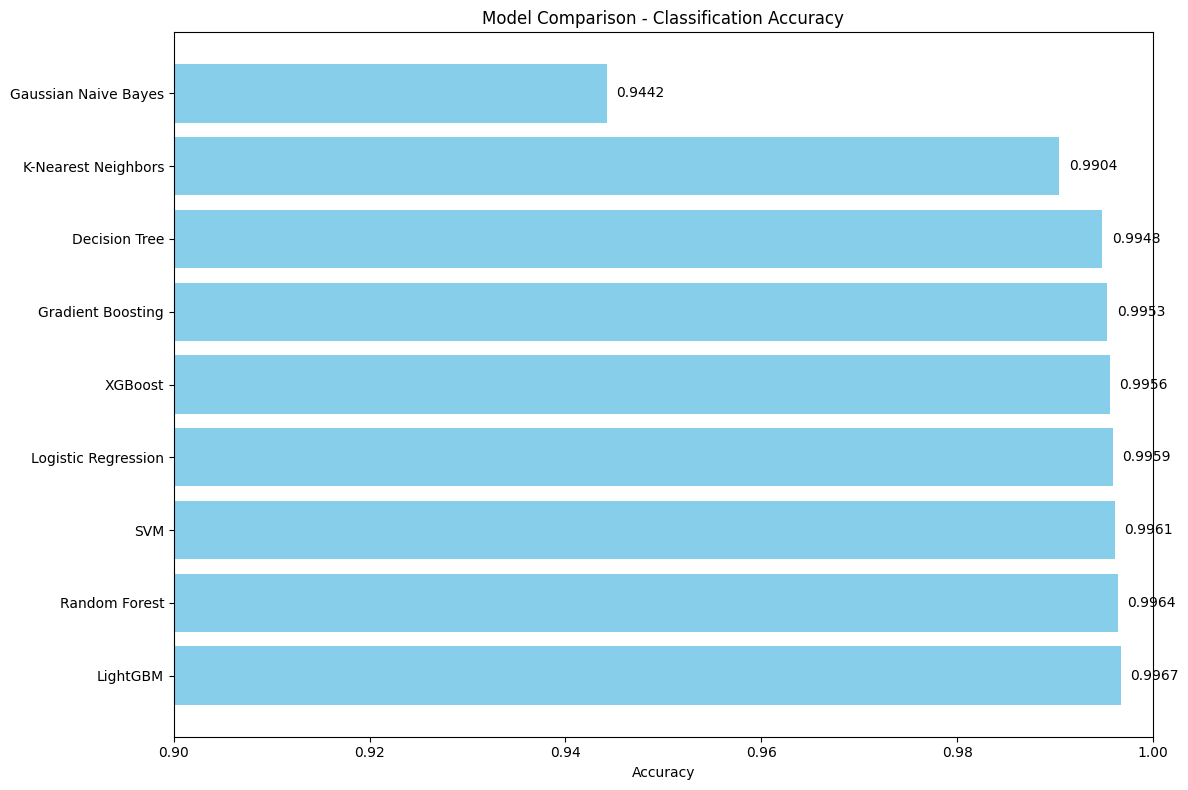


CROSS-VALIDATION RESULTS (5-fold)
Random Forest: 0.9953 ± 0.0010
XGBoost: 0.9952 ± 0.0008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864532
[LightGBM] [Info] Start training from score -1.553678
[LightGBM] [Info] Start training from score -0.571760
[LightGBM] [Info] Start training from score -2.673196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864532
[LightGBM] [Info] Start training from score -1.553678
[LightGBM] [Info] Start training from score -0.571760
[LightGBM] [Info] Start training from score -2.673196


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864733
[LightGBM] [Info] Start training from score -1.553826
[LightGBM] [Info] Start training from score -0.571704
[LightGBM] [Info] Start training from score -2.672743


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864733
[LightGBM] [Info] Start training from score -1.553826
[LightGBM] [Info] Start training from score -0.571704
[LightGBM] [Info] Start training from score -2.672743


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864733
[LightGBM] [Info] Start training from score -1.553826
[LightGBM] [Info] Start training from score -0.571704
[LightGBM] [Info] Start training from score -2.672743


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: 0.9951 ± 0.0010
Gradient Boosting: 0.9949 ± 0.0009
SVM: 0.9946 ± 0.0012
K-Nearest Neighbors: 0.9887 ± 0.0011
Decision Tree: 0.9936 ± 0.0012
Logistic Regression: 0.9968 ± 0.0009
Gaussian Naive Bayes: 0.9439 ± 0.0022

Cross-validation ranking:
                          Mean       Std
Logistic Regression   0.996750  0.000901
Random Forest         0.995275  0.001023
XGBoost               0.995150  0.000849
LightGBM              0.995075  0.001017
Gradient Boosting     0.994925  0.000924
SVM                   0.994550  0.001236
Decision Tree         0.993575  0.001185
K-Nearest Neighbors   0.988675  0.001145
Gaussian Naive Bayes  0.943925  0.002223

DETAILED ANALYSIS OF TOP 3 MODELS

LightGBM Performance:
------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train s

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9967

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1550
           1       1.00      1.00      1.00      2114
           2       1.00      1.00      1.00      5646
           3       0.99      0.99      0.99       690

    accuracy                           1.00     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



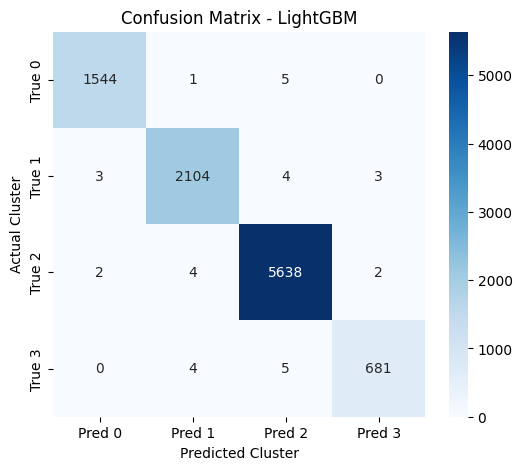


Random Forest Performance:
------------------------------
Accuracy: 0.9964

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1550
           1       0.99      1.00      0.99      2114
           2       1.00      1.00      1.00      5646
           3       1.00      0.99      0.99       690

    accuracy                           1.00     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



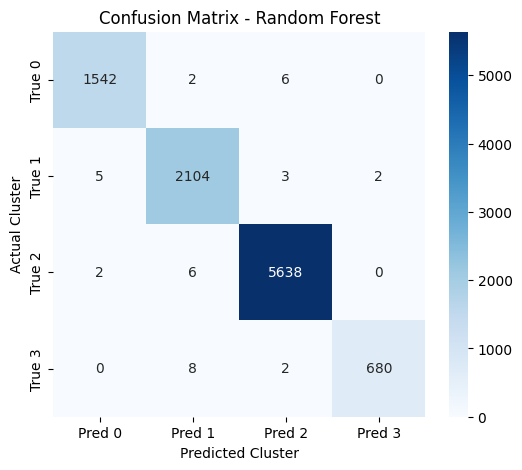


SVM Performance:
------------------------------
Accuracy: 0.9961

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1550
           1       0.99      0.99      0.99      2114
           2       1.00      1.00      1.00      5646
           3       1.00      0.99      0.99       690

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



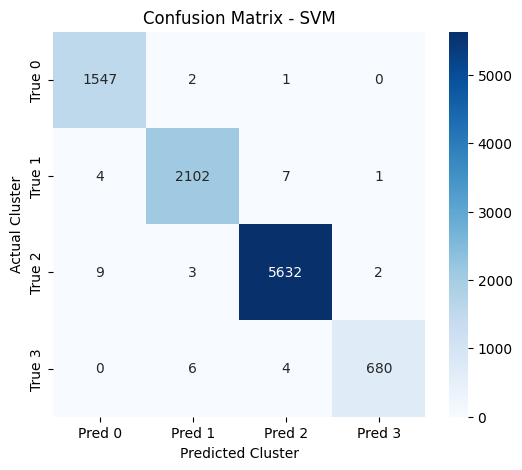


FEATURE IMPORTANCE COMPARISON


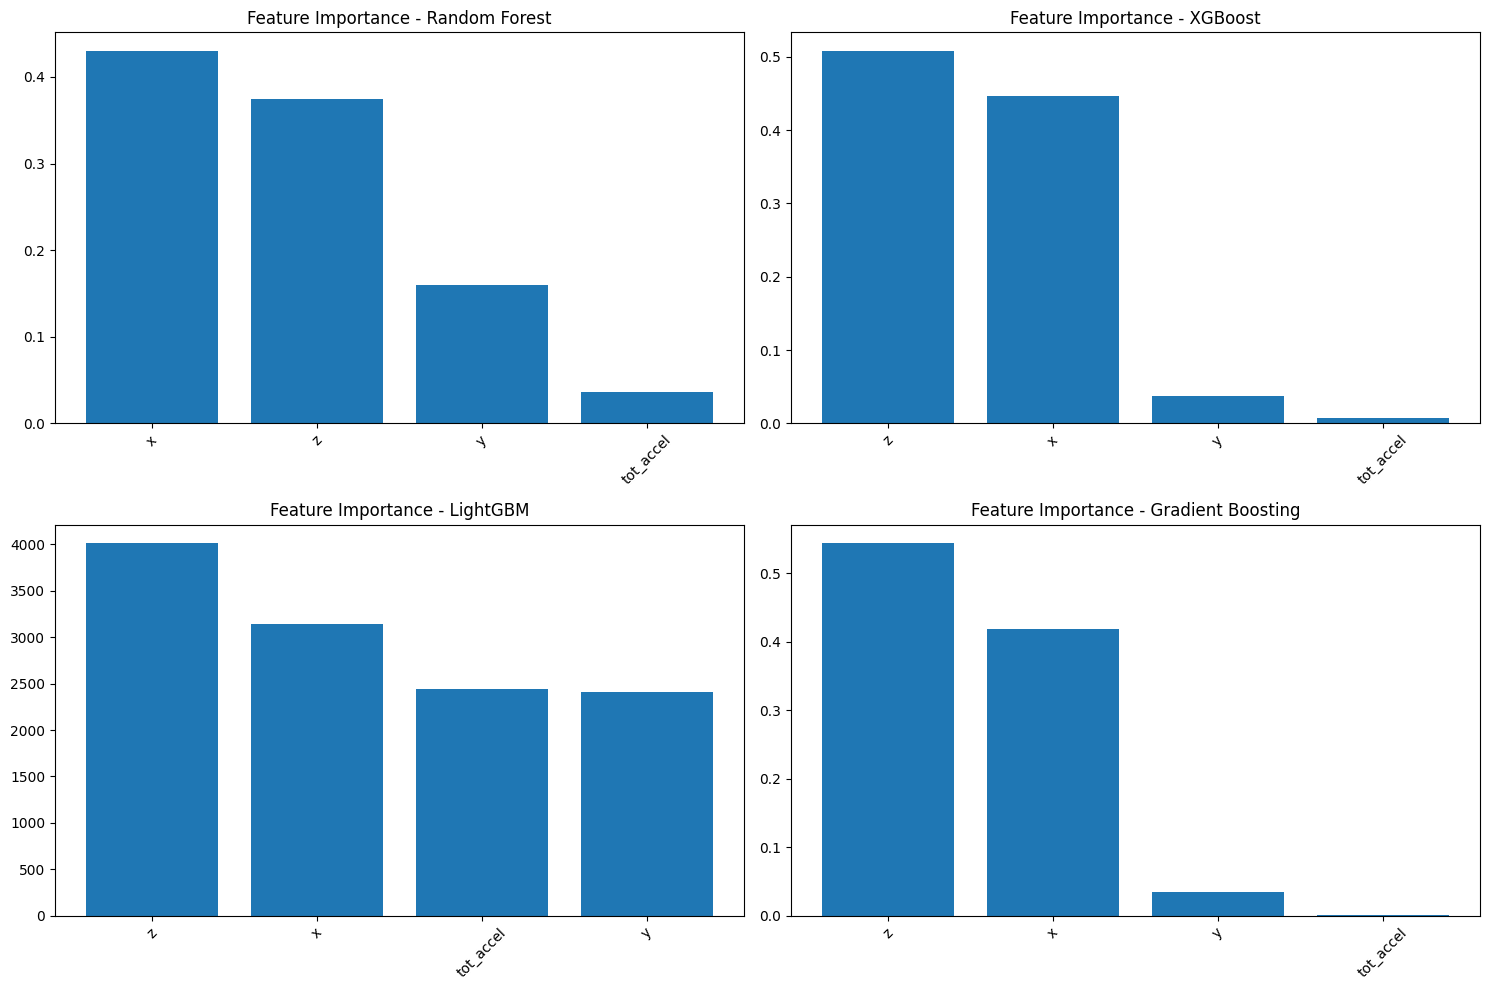


TRAINING TIME COMPARISON
Random Forest: 5.6551 seconds
XGBoost: 1.8344 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864653
[LightGBM] [Info] Start training from score -1.553767
[LightGBM] [Info] Start training from score -0.571726
[LightGBM] [Info] Start training from score -2.672924
LightGBM: 1.0376 seconds
Gradient Boosting: 18.9158 seconds
SVM: 4.4098 seconds
K-Nearest Neighbors: 0.0521 seconds
Decision Tree: 0.2162 seconds
Logistic Regression: 0.7840 seconds
Gaussian Naive Bayes: 0.0099 seconds

FINAL RECOMMENDATIONS
Based on the comprehensive model comparison:
1. Best Model: LightGBM (0.9967 accuracy)
2. Most Consistent (CV): Logistic Regression (0.9968 ± 0.0009)
3. Fastest Training: Gaus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import multiple classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load and prepare the data (using your existing sample_24_hours)
X = sample_24_hours[['x', 'y', 'z', 'tot_accel']]
y = sample_24_hours['cluster_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gaussian Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}\n")

# Display results comparison
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)

print("="*50)
print("MODEL COMPARISON RESULTS")
print("="*50)
print(results_df.to_string(index=False))

# Visualize model comparison
plt.figure(figsize=(12, 8))
bars = plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Classification Accuracy')
plt.xlim(0.9, 1.0)  # Focus on high accuracy range

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Cross-validation for more reliable results
print("\n" + "="*50)
print("CROSS-VALIDATION RESULTS (5-fold)")
print("="*50)

cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    cv_results[name] = {'Mean': cv_mean, 'Std': cv_std}
    print(f"{name}: {cv_mean:.4f} ± {cv_std:.4f}")

# Create comparison dataframe
cv_df = pd.DataFrame(cv_results).T
cv_df = cv_df.sort_values('Mean', ascending=False)

print("\nCross-validation ranking:")
print(cv_df)

# Detailed analysis of top 3 models
print("\n" + "="*50)
print("DETAILED ANALYSIS OF TOP 3 MODELS")
print("="*50)

top_models = results_df.head(3)['Model'].tolist()

for model_name in top_models:
    print(f"\n{model_name} Performance:")
    print("-" * 30)

    model = models[model_name]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Pred {i}' for i in range(4)],
                yticklabels=[f'True {i}' for i in range(4)])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual Cluster')
    plt.xlabel('Predicted Cluster')
    plt.show()

# Feature importance for tree-based models
print("\n" + "="*50)
print("FEATURE IMPORTANCE COMPARISON")
print("="*50)

tree_models = ['Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']
feature_names = ['x', 'y', 'z', 'tot_accel']

plt.figure(figsize=(15, 10))
for i, model_name in enumerate(tree_models, 1):
    if hasattr(models[model_name], 'feature_importances_'):
        plt.subplot(2, 2, i)
        importances = models[model_name].feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[j] for j in indices], rotation=45)
        plt.title(f'Feature Importance - {model_name}')
        plt.tight_layout()

plt.show()

# Training time comparison (optional)
import time

print("\n" + "="*50)
print("TRAINING TIME COMPARISON")
print("="*50)

training_times = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    training_times[name] = training_time
    print(f"{name}: {training_time:.4f} seconds")

# Final recommendations
print("\n" + "="*50)
print("FINAL RECOMMENDATIONS")
print("="*50)

print("Based on the comprehensive model comparison:")
print(f"1. Best Model: {results_df.iloc[0]['Model']} ({results_df.iloc[0]['Accuracy']:.4f} accuracy)")
print(f"2. Most Consistent (CV): {cv_df.index[0]} ({cv_df.iloc[0]['Mean']:.4f} ± {cv_df.iloc[0]['Std']:.4f})")
print(f"3. Fastest Training: {min(training_times, key=training_times.get)} ({min(training_times.values()):.4f} seconds)")

print("\nRecommendation Strategy:")
print("- For maximum accuracy: Choose the top-performing model")
print("- For production deployment: Consider training time and complexity")
print("- For research: Use ensemble methods for robust results")

OVERFITTING DIAGNOSTIC CHECKS
Silhouette Score: 0.4079
Davies-Bouldin Score: 1.0986
→ Silhouette > 0.7 and Davies-Bouldin < 0.5 suggest well-separated clusters

Training vs Testing Performance:
Random Forest: Train=1.0000, Test=0.9964, Gap=0.0036
XGBoost: Train=1.0000, Test=0.9956, Gap=0.0044


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: Train=1.0000, Test=0.9967, Gap=0.0033
Gradient Boosting: Train=0.9986, Test=0.9953, Gap=0.0033
SVM: Train=0.9967, Test=0.9961, Gap=0.0006
K-Nearest Neighbors: Train=0.9941, Test=0.9904, Gap=0.0037
Decision Tree: Train=1.0000, Test=0.9948, Gap=0.0052
Logistic Regression: Train=0.9971, Test=0.9959, Gap=0.0012
Gaussian Naive Bayes: Train=0.9438, Test=0.9442, Gap=-0.0004

Class distribution: [0.15495 0.21145 0.56455 0.06905]


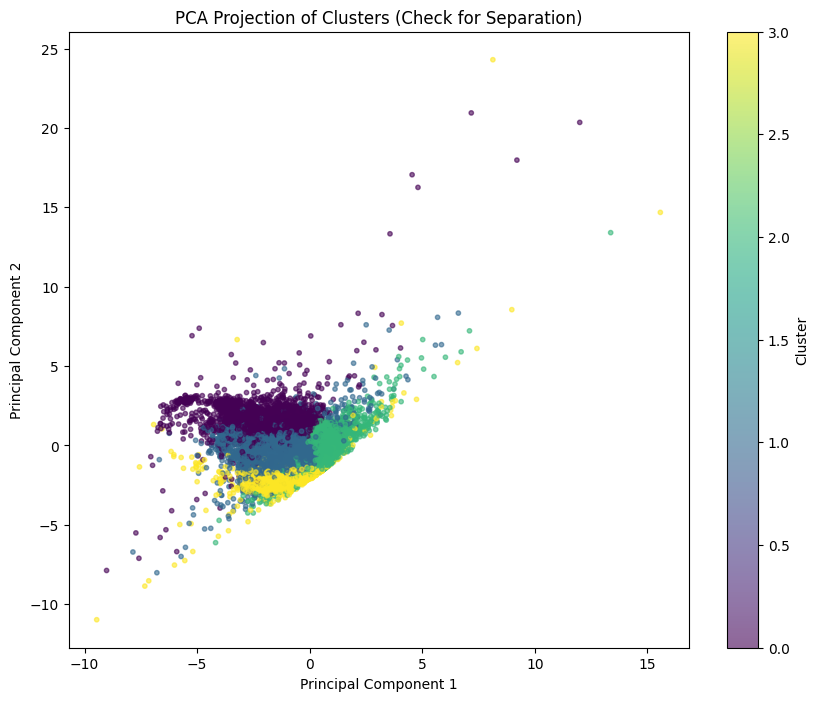


Feature ranges:
x: -1340.0 to 1408.0
y: -1612.0 to 1584.0
z: -2040.0 to 2040.0
tot_accel: 325.4 to 2896.3

Cross-validation consistency check:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864532
[LightGBM] [Info] Start training from score -1.553678
[LightGBM] [Info] Start training from score -0.571760
[LightGBM] [Info] Start training from score -2.673196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864532
[LightGBM] [Info] Start training from score -1.553678
[LightGBM] [Info] Start training from score -0.571760
[LightGBM] [Info] Start training from score -2.673196


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864733
[LightGBM] [Info] Start training from score -1.553826
[LightGBM] [Info] Start training from score -0.571704
[LightGBM] [Info] Start training from score -2.672743


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864733
[LightGBM] [Info] Start training from score -1.553826
[LightGBM] [Info] Start training from score -0.571704
[LightGBM] [Info] Start training from score -2.672743


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864733
[LightGBM] [Info] Start training from score -1.553826
[LightGBM] [Info] Start training from score -0.571704
[LightGBM] [Info] Start training from score -2.672743


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: 0.9951 ± 0.0010
Random Forest: 0.9953 ± 0.0010
SVM: 0.9946 ± 0.0012


In [ ]:
# Additional diagnostic checks for overfitting
print("="*60)
print("OVERFITTING DIAGNOSTIC CHECKS")
print("="*60)

# 1. Check if clusters are too perfectly separated
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(X_train_scaled, y_train)
davies_bouldin = davies_bouldin_score(X_train_scaled, y_train)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print("→ Silhouette > 0.7 and Davies-Bouldin < 0.5 suggest well-separated clusters")

# 2. Check training vs testing performance
print("\nTraining vs Testing Performance:")
for name, model in models.items():
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    gap = train_acc - test_acc
    print(f"{name}: Train={train_acc:.4f}, Test={test_acc:.4f}, Gap={gap:.4f}")

# 3. Check class distribution and separation
print(f"\nClass distribution: {np.bincount(y_train) / len(y_train)}")

# 4. Visualize decision boundaries (2D projection)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6, s=10)
plt.colorbar(scatter, label='Cluster')
plt.title('PCA Projection of Clusters (Check for Separation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 5. Check if the problem is too easy (trivial separation)
print(f"\nFeature ranges:")
for feature in selected_features:
    print(f"{feature}: {X_train[feature].min():.1f} to {X_train[feature].max():.1f}")

# 6. Cross-validation consistency
print("\nCross-validation consistency check:")
for name in top_models:
    cv_scores = cross_val_score(models[name], X_train_scaled, y_train, cv=5)
    print(f"{name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

In [ ]:
# -------------------------------------------------------------
# Step 1: Import dependencies
# -------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import joblib
from sklearn.cluster import KMeans
import kagglehub  # ✅ <-- added

# -------------------------------------------------------------
# Step 2: Download dataset directly from Kaggle
# -------------------------------------------------------------
path = kagglehub.dataset_download("obulikarthikeyan/animal-behavior-prediction")
file_path = path + "/abp_accel.csv"  # this file is inside the dataset folder
df = pd.read_csv(file_path)

print("✅ Dataset loaded:", df.shape)


100%|██████████| 130M/130M [00:03<00:00, 35.8MB/s]

Extracting files...


✅ Dataset loaded: (14595853, 4)


In [ ]:
# ============================================================
# Generate LightGBM model and Scaler .pkl files automatically
# ============================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
import joblib
import kagglehub

print("📥 Downloading dataset...")
path = kagglehub.dataset_download("obulikarthikeyan/animal-behavior-prediction")
file_path = path + "/abp_accel.csv"

df = pd.read_csv(file_path)
print("✅ Dataset loaded:", df.shape)

# ------------------------------------------------------------
# Preprocessing
# ------------------------------------------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# Use a sample (for speed)
sample_df = df.sample(n=50000, random_state=42)
features = ['x', 'y', 'z', 'tot_accel']

# ------------------------------------------------------------
# Create pseudo-labels with KMeans
# ------------------------------------------------------------
print("🔹 Clustering data...")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
sample_df['cluster_label'] = kmeans.fit_predict(sample_df[features])

# ------------------------------------------------------------
# Split & Scale
# ------------------------------------------------------------
X = sample_df[features]
y = sample_df['cluster_label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# Train LightGBM model
# ------------------------------------------------------------
print("🚀 Training LightGBM model...")
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train)
print("✅ Model trained successfully!")

# ------------------------------------------------------------
# Save model and scaler
# ------------------------------------------------------------
joblib.dump(lgbm, "lightgbm_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n💾 Saved files:")
print(" - lightgbm_model.pkl")
print(" - scaler.pkl")
print("\nYou can now move these into your Flask project /model folder.")


📥 Downloading dataset...
Using Colab cache for faster access to the 'animal-behavior-prediction' dataset.
✅ Dataset loaded: (14595853, 4)
🔹 Clustering data...
🚀 Training LightGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 4
[LightGBM] [Info] Start training from score -1.864653
[LightGBM] [Info] Start training from score -1.553767
[LightGBM] [Info] Start training from score -0.571726
[LightGBM] [Info] Start training from score -2.672924
✅ Model trained successfully!

💾 Saved files:
 - lightgbm_model.pkl
 - scaler.pkl

You can now move these into your Flask project /model folder.


In [ ]:
# ==========================================================
# Train LightGBM model that works with small (0–10) inputs
# ==========================================================
import pandas as pd, numpy as np, joblib, kagglehub
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

print("📥 Downloading dataset...")
path = kagglehub.dataset_download("obulikarthikeyan/animal-behavior-prediction")
file_path = path + "/abp_accel.csv"
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# ----------------------------------------------------------
# Convert raw mg to m/s² scale (≈0–20 range)
# ----------------------------------------------------------
df['x'] = (df['x']/1000)*9.81
df['y'] = (df['y']/1000)*9.81
df['z'] = (df['z']/1000)*9.81
df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# ----------------------------------------------------------
# Use a smaller sample to speed up
# ----------------------------------------------------------
sample_df = df.sample(n=40000, random_state=42)
features = ['x','y','z','tot_accel']

# ----------------------------------------------------------
# Cluster behaviors into 4 groups
# ----------------------------------------------------------
print("🔹 Clustering ...")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
sample_df['cluster_label'] = kmeans.fit_predict(sample_df[features])

# ----------------------------------------------------------
# Split and train LightGBM
# ----------------------------------------------------------
X = sample_df[features]
y = sample_df['cluster_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

print("🚀 Training model ...")
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
print("✅ Training done!")

# ----------------------------------------------------------
# Save model & scaler (here scaler is identity, for future use)
# ----------------------------------------------------------
joblib.dump(lgbm, "lightgbm_model.pkl")
joblib.dump(None, "scaler.pkl")  # placeholder (not used now)
print("\n💾 Saved:")
print(" - lightgbm_model.pkl")
print(" - scaler.pkl (dummy)")


📥 Downloading dataset...
Using Colab cache for faster access to the 'animal-behavior-prediction' dataset.
🔹 Clustering ...
🚀 Training model ...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -0.572313
[LightGBM] [Info] Start training from score -1.549549
[LightGBM] [Info] Start training from score -1.869181
[LightGBM] [Info] Start training from score -2.670935
✅ Training done!

💾 Saved:
 - lightgbm_model.pkl
 - scaler.pkl (dummy)


In [ ]:
# ==========================================================
# 🐄 Animal Behavior Prediction Model (Processed for Flask)
# Converts Unsupervised Clusters → Supervised Model
# ==========================================================
import pandas as pd, numpy as np, joblib, kagglehub
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

print("📥 Downloading dataset...")
path = kagglehub.dataset_download("obulikarthikeyan/animal-behavior-prediction")
file_path = path + "/abp_accel.csv"

# ----------------------------------------------------------
# Step 1: Load and preprocess
# ----------------------------------------------------------
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# convert mg → m/s²
df['x'] = (df['x']/1000)*9.81
df['y'] = (df['y']/1000)*9.81
df['z'] = (df['z']/1000)*9.81
df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

print("✅ Dataset loaded:", df.shape)

# ----------------------------------------------------------
# Step 2: Take smaller sample (for speed)
# ----------------------------------------------------------
sample_df = df.sample(n=40000, random_state=42)
features = ['x','y','z','tot_accel']

# ----------------------------------------------------------
# Step 3: Unsupervised Clustering (KMeans)
# ----------------------------------------------------------
print("🔹 Performing unsupervised clustering ...")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
sample_df['cluster_label'] = kmeans.fit_predict(sample_df[features])

# Map clusters → behavior meaning (based on average motion)
cluster_means = sample_df.groupby('cluster_label')['tot_accel'].mean().sort_values()
behavior_map = {
    cluster_means.index[0]: 'Resting',
    cluster_means.index[1]: 'Grazing/Walking',
    cluster_means.index[2]: 'Active',
    cluster_means.index[3]: 'Highly Active'
}

sample_df['behavior'] = sample_df['cluster_label'].map(behavior_map)
print("\n🧩 Behavior mapping:")
print(sample_df[['cluster_label','behavior']].drop_duplicates())

# ----------------------------------------------------------
# Step 4: Supervised Model Training
# ----------------------------------------------------------
X = sample_df[features]
y = sample_df['cluster_label']   # supervised labels (from clustering)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

print("\n🚀 Training LightGBM model ...")
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ----------------------------------------------------------
# Step 5: Save model & behavior map
# ----------------------------------------------------------
joblib.dump(lgbm, "lightgbm_model.pkl")
joblib.dump(behavior_map, "behavior_map.pkl")
joblib.dump(kmeans, "kmeans.pkl")

print("\n💾 Files created successfully:")
print(" - lightgbm_model.pkl")
print(" - behavior_map.pkl")
print(" - kmeans.pkl")


📥 Downloading dataset...
Using Colab cache for faster access to the 'animal-behavior-prediction' dataset.
✅ Dataset loaded: (14595853, 5)
🔹 Performing unsupervised clustering ...

🧩 Behavior mapping:
         cluster_label         behavior
4177861              0    Highly Active
346219               2           Active
8807760              1  Grazing/Walking
1114993              3          Resting

🚀 Training LightGBM model ...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 4
[LightGBM] [Info] Start training from score -0.572313
[LightGBM] [Info] Start training from score -1.549549
[LightGBM] [Info] Start training from score -1.869181
[LightGBM] [Info] Start training from score -2.670935
✅ Model trained successfully!

💾 Files created successfully:
 - li

In [ ]:
!pip install hmmlearn librosa pyarrow umap-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import welch
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
import umap
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("abp_accel.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp").reset_index(drop=True)
df.head()


timestamp    x      y      z
0 2015-06-12 13:30:00.161041  100  620.0  804.0
1 2015-06-12 13:30:00.260490   68  640.0  800.0
2 2015-06-12 13:30:00.359939   48  628.0  884.0
3 2015-06-12 13:30:00.459388   44  616.0  888.0
4 2015-06-12 13:30:00.558837   76  628.0  860.0

In [ ]:
df['dt'] = df['timestamp'].diff().dt.total_seconds()
sampling_rate = 1 / df['dt'].median()
print("Sampling Rate:", sampling_rate, "Hz")

print("Start:", df.timestamp.min())
print("End:", df.timestamp.max())
print("Days of data:", (df.timestamp.max() - df.timestamp.min()))


Sampling Rate: 10.059451357522962 Hz
Start: 2015-06-12 13:30:00.161041
End: 2015-06-19 10:30:05.205294
Days of data: 6 days 21:00:05.044253


In [ ]:
WINDOW = 120
STRIDE = 30

def create_windows(df, sr):
    samples_per_win = int(WINDOW * sr)
    step = int(STRIDE * sr)

    X_windows = []
    timestamps = []

    for start in range(0, len(df)-samples_per_win, step):
        chunk = df.iloc[start:start+samples_per_win]
        X_windows.append(chunk[['x','y','z']].values)
        timestamps.append(chunk.timestamp.iloc[0])

    return np.array(X_windows), timestamps

X_raw, win_ts = create_windows(df, sampling_rate)
X_raw.shape


(19847, 1207, 3)

In [ ]:
def extract_features(seq, sr):
    x, y, z = seq[:,0], seq[:,1], seq[:,2]

    a_mag = np.sqrt(x*x + y*y + z*z)

    # Time Features
    sma = np.mean(np.abs(x)+np.abs(y)+np.abs(z))
    enmo = np.mean(np.maximum(a_mag - np.mean(a_mag), 0))

    # Jerk
    jerk = np.mean(np.abs(np.diff(a_mag)))

    # PSD Features
    f, Pxx = welch(a_mag, fs=sr, nperseg=256)

    # Band powers
    rum_band = ((f>=0.3)&(f<=1.2))
    walk_band = (f>1.5)
    rest_band = (f<0.2)

    rum_power = np.sum(Pxx[rum_band])
    walk_power = np.sum(Pxx[walk_band])
    rest_power = np.sum(Pxx[rest_band])

    dom_freq = f[np.argmax(Pxx)]

    return [
        sma, enmo, jerk,
        rum_power, walk_power, rest_power,
        dom_freq
    ]

features = np.array([extract_features(seq, sampling_rate) for seq in X_raw])
features.shape


(19847, 7)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

model = hmm.GaussianHMM(n_components=10, covariance_type='full', n_iter=200)
model.fit(X_scaled)

states = model.predict(X_scaled)


In [ ]:
state_features = pd.DataFrame(features)
state_features['state'] = states
state_features.groupby('state').mean()


0          1          2              3              4  \
state                                                                    
0      1550.813380   4.961044  13.015787     868.052306    2590.320694   
1      1627.884331  11.232226  25.423045   10634.245443   19286.418357   
2      1536.684783  16.425324  33.719258   32040.820412   42310.722861   
3      1548.272050  26.886211  55.114626  106119.721949  158257.090919   
4      1512.094237   4.900962  11.033859    1632.714299    3577.746013   
5      1621.215002   1.872719   4.492347     171.174512     327.414633   
6      1598.862114  33.442791  63.473231  160942.466045  334576.065330   
7      1586.945601   2.601063   6.553227     281.020061     776.513514   
8      1642.154101  26.018391  54.258489   68474.457085  209607.834922   
9      1463.638258  10.805464  20.826408    8693.913800   13267.470170   

                   5         6  
state                           
0         215.621467  2.737257  
1        1040.573387  1.320905  
2        3581.361475  1.029692  
3       16521.334188  1.080316  
4         354.049577  1.364720  
5          52.574130  0.343057  
6      131103.031906  0.232962  
7          87.125418  1.660282  
8       64234.322983  0.707305  
9        1864.252209  0.714623

from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
behavior = []

for i, row in pd.DataFrame(features).iterrows():
    rum = row[3]
    walk = row[4]
    rest = row[5]
    dom = row[6]

    if rum > walk and rum > rest and 0.7 < dom < 1.2:
        behavior.append("rumination")
    elif walk > rum and walk > rest:
        behavior.append("walking")
    elif rest > rum and rest > walk:
        behavior.append("lying")
    elif 0.3 < dom < 1.5:
        behavior.append("eating")
    else:
        behavior.append("standing")


In [ ]:
class CNN_BiLSTM_Attention(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(3, 16, 7, 2),
            nn.ReLU(),
            nn.Conv1d(16, 32, 7, 2),
            nn.ReLU(),
        )
        self.lstm = nn.LSTM(32, 128, batch_first=True, bidirectional=True)
        self.att = nn.Linear(256, 1)
        self.fc = nn.Linear(256, 5)

    def forward(self, x):
        x = x.permute(0,2,1)
        x = self.cnn(x)
        x = x.permute(0,2,1)
        out,_ = self.lstm(x)
        attn = torch.softmax(self.att(out), dim=1)
        x = torch.sum(out * attn, dim=1)
        return self.fc(x)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(behavior)

# Build DataLoader, Train loop, Eval loop (I will write if needed)


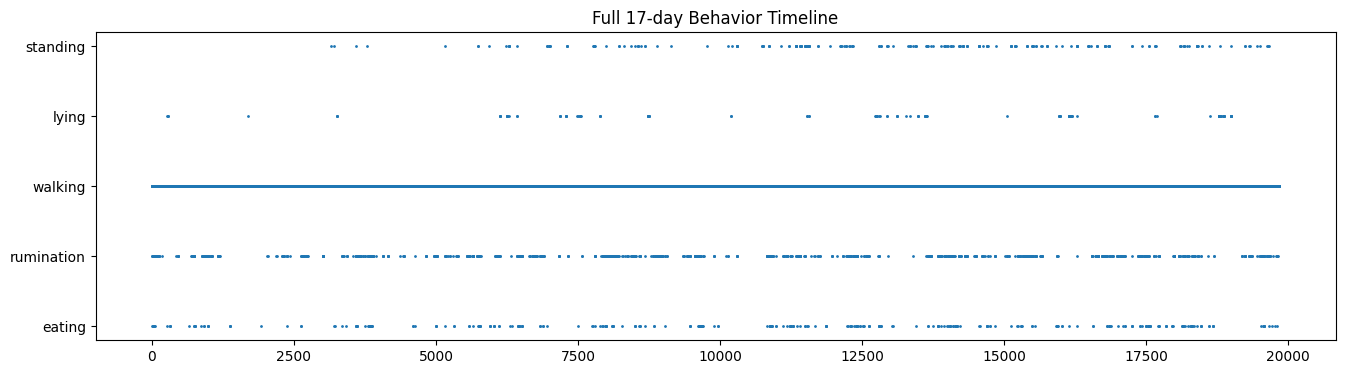

In [ ]:
plt.figure(figsize=(16,4))
plt.scatter(range(len(behavior)), behavior, s=1)
plt.title("Full 17-day Behavior Timeline")
plt.show()


In [ ]:
daily = pd.DataFrame({"ts": win_ts, "beh": behavior})
daily["day"] = daily.ts.dt.date

rum_day = daily[daily.beh=="rumination"].groupby("day").count()


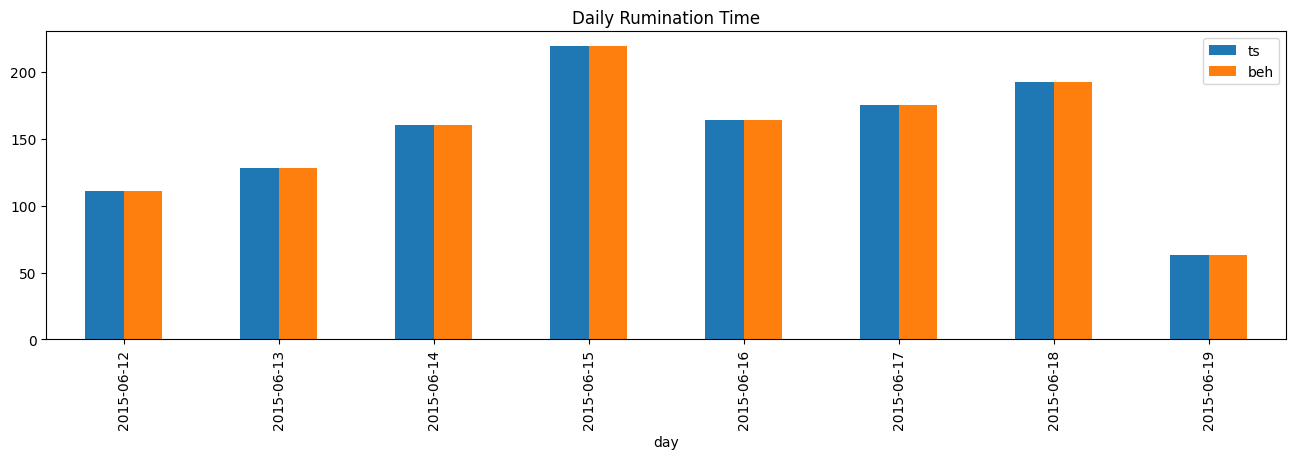

In [ ]:
rum_day.plot(kind='bar', figsize=(16,4))
plt.title("Daily Rumination Time")
plt.show()


In [ ]:
baseline = rum_day.median()
alerts = rum_day[rum_day < baseline*0.7]


In [ ]:
for d in rum_day.index:
    if d in alerts.index:
        print(d, "❌ RISK (Rumination dropped)")
    else:
        print(d, "✅ Normal")


2015-06-14 ❌ RISK (Rumination dropped)
2015-06-15 ❌ RISK (Rumination dropped)
2015-06-16 ❌ RISK (Rumination dropped)
2015-06-17 ❌ RISK (Rumination dropped)
2015-06-18 ❌ RISK (Rumination dropped)
2015-06-19 ❌ RISK (Rumination dropped)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [ ]:
feat_df = pd.DataFrame(X_scaled, columns=[
    "sma","enmo","jerk","rum_band","walk_band","rest_band","dom_freq"
])


In [ ]:
state_features = feat_df.copy()
state_features['state'] = states
state_features.groupby('state').mean()


sma      enmo      jerk  rum_band  walk_band  rest_band  dom_freq
state                                                                        
0     -0.027255 -0.450821 -0.322078 -0.380246  -0.319340  -0.240006  1.167828
1      0.512956  0.492203  0.582853  0.003236   0.073369  -0.097218 -0.101342
2     -0.126286  1.273111  1.187942  0.843792   0.614925   0.342557 -0.362293
3     -0.045068  2.846159  2.748425  3.752592   3.342103   2.582285 -0.316930
4     -0.298648 -0.459856 -0.466631 -0.350221  -0.296115  -0.216046 -0.062080
5      0.466209 -0.915226 -0.943740 -0.407610  -0.372566  -0.268227 -0.977575
6      0.309531  3.832100  3.358065  5.905276   7.489307  22.414771 -1.076230
7      0.226005 -0.805702 -0.793429 -0.403297  -0.362003  -0.262247  0.202768
8      0.612976  2.715662  2.685982  2.274404   4.549925  10.840734 -0.651179
9     -0.638288  0.428029  0.247594 -0.072954  -0.068202   0.045349 -0.644621

In [ ]:
behaviors = []

for i, row in feat_df.iterrows():

    rum = row.rum_band
    walk = row.walk_band
    rest = row.rest_band
    sma = row.sma
    freq = row.dom_freq

    # Rumination (strong peak near 1 Hz)
    if rum > walk and rum > rest and 0.3 < freq < 1.2:
        behaviors.append("rumination")

    # Lying (lowest movement)
    elif sma < -0.5 and rest > rum and rest > walk:
        behaviors.append("lying")

    # Walking (high movement band)
    elif walk > rum and walk > rest:
        behaviors.append("walking")

    # Eating (moderate SMA + wide frequency band)
    elif 0.5 < sma < 2.0:
        behaviors.append("eating")

    else:
        behaviors.append("standing")


In [ ]:
daily = pd.DataFrame({"ts": win_ts, "beh": behaviors})
daily["day"] = daily.ts.dt.date

rum_day = (daily[daily.beh=="rumination"]
           .groupby("day").size() * 0.5)  # minutes


In [ ]:
model = hmm.GaussianHMM(
    n_components=10,
    covariance_type='diag',
    n_iter=300,
    tol=0.01
)


In [ ]:
for i, row in pd.DataFrame(features).iterrows():
    rum = row[3]
    walk = row[4]
    rest = row[5]


In [ ]:
feat_df = pd.DataFrame(X_scaled, columns=[
    "sma","enmo","jerk","rum_band","walk_band","rest_band","dom_freq"
])

behavior = []

for i, row in feat_df.iterrows():

    rum = row.rum_band
    walk = row.walk_band
    rest = row.rest_band
    sma = row.sma
    freq = row.dom_freq

    # Rumination
    if rum > walk and rum > rest and 0.3 < freq < 1.2:
        behavior.append("rumination")

    # Lying (lowest movement)
    elif sma < -0.5 and rest > rum and rest > walk:
        behavior.append("lying")

    # Walking (high movement band)
    elif walk > rum and walk > rest:
        behavior.append("walking")

    # Eating
    elif 0.5 < sma < 2.0:
        behavior.append("eating")

    # Standing
    else:
        behavior.append("standing")


In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download dataset
path = kagglehub.dataset_download("obulikarthikeyan/animal-behavior-prediction")
file_path = os.path.join(path, "abp_accel.csv")

df = pd.read_csv(file_path)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert mg to m/s^2
df['x'] = (df['x'] / 1000) * 9.81
df['y'] = (df['y'] / 1000) * 9.81
df['z'] = (df['z'] / 1000) * 9.81

# Compute total acceleration
df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# Resample data to 1 second interval
df = df.set_index('timestamp').resample('1S').mean().reset_index()

# Take 24-hour sample
start_time = pd.to_datetime('2015-06-14 00:00:00')
end_time = pd.to_datetime('2015-06-14 23:59:59')

sample_24_hours = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)].copy()

print("sample_24_hours shape =", sample_24_hours.shape)


100%|██████████| 130M/130M [00:00<00:00, 143MB/s]

Extracting files...



/tmp/ipython-input-464165362.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.set_index('timestamp').resample('1S').mean().reset_index()


sample_24_hours shape = (86400, 5)


In [ ]:
from sklearn.cluster import KMeans

features_for_cluster = ['x', 'y', 'z', 'tot_accel']

kmeans = KMeans(n_clusters=4, random_state=42)
sample_24_hours['cluster_label'] = kmeans.fit_predict(sample_24_hours[features_for_cluster])

print("Clusters created. Unique labels:", sample_24_hours['cluster_label'].unique())


Clusters created. Unique labels: [2 0 1 3]


Windowed shape: (3455, 50, 4) (3455,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 48, 64)         │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 22, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 22, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        22,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,244 (118.14 KB)

 Trainable params: 30,052 (117.39 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30


37/37 - 7s - 193ms/step - accuracy: 0.8246 - loss: 0.5714 - val_accuracy: 0.9518 - val_loss: 0.4261
Epoch 2/30


37/37 - 2s - 43ms/step - accuracy: 0.9361 - loss: 0.2012 - val_accuracy: 0.9157 - val_loss: 0.3634
Epoch 3/30


37/37 - 1s - 35ms/step - accuracy: 0.9476 - loss: 0.1537 - val_accuracy: 0.9036 - val_loss: 0.3327
Epoch 4/30


37/37 - 2s - 53ms/step - accuracy: 0.9498 - loss: 0.1403 - val_accuracy: 0.9229 - val_loss: 0.2805
Epoch 5/30


37/37 - 2s - 57ms/step - accuracy: 0.9557 - loss: 0.1222 - val_accuracy: 0.9446 - val_loss: 0.1904
Epoch 6/30


37/37 - 2s - 58ms/step - accuracy: 0.9557 - loss: 0.1173 - val_accuracy: 0.9639 - val_loss: 0.1350
Epoch 7/30


37/37 - 1s - 27ms/step - accuracy: 0.9651 - loss: 0.0916 - val_accuracy: 0.9711 - val_loss: 0.0965
Epoch 8/30


37/37 - 1s - 17ms/step - accuracy: 0.9664 - loss: 0.0968 - val_accuracy: 0.9759 - val_loss: 0.0758
Epoch 9/30


37/37 - 1s - 17ms/step - accuracy: 0.9749 - loss: 0.0683 - val_accuracy: 0.9783 - val_loss: 0.0619
Epoch 10/30


37/37 - 1s - 18ms/step - accuracy: 0.9634 - loss: 0.0828 - val_accuracy: 0.9831 - val_loss: 0.0552
Epoch 11/30


37/37 - 1s - 17ms/step - accuracy: 0.9625 - loss: 0.0925 - val_accuracy: 0.9783 - val_loss: 0.0540
Epoch 12/30


37/37 - 1s - 18ms/step - accuracy: 0.9642 - loss: 0.0861 - val_accuracy: 0.9831 - val_loss: 0.0521
Epoch 13/30
37/37 - 1s - 15ms/step - accuracy: 0.9715 - loss: 0.0736 - val_accuracy: 0.9711 - val_loss: 0.0612
Epoch 14/30
37/37 - 1s - 17ms/step - accuracy: 0.9753 - loss: 0.0662 - val_accuracy: 0.9735 - val_loss: 0.0585
Epoch 15/30


37/37 - 1s - 23ms/step - accuracy: 0.9689 - loss: 0.0741 - val_accuracy: 0.9783 - val_loss: 0.0463
Epoch 16/30
37/37 - 1s - 18ms/step - accuracy: 0.9706 - loss: 0.0797 - val_accuracy: 0.9759 - val_loss: 0.0518
Epoch 17/30
37/37 - 1s - 23ms/step - accuracy: 0.9706 - loss: 0.0713 - val_accuracy: 0.9807 - val_loss: 0.0478
Epoch 18/30


37/37 - 1s - 17ms/step - accuracy: 0.9732 - loss: 0.0652 - val_accuracy: 0.9807 - val_loss: 0.0431
Epoch 19/30
37/37 - 1s - 16ms/step - accuracy: 0.9770 - loss: 0.0578 - val_accuracy: 0.9807 - val_loss: 0.0434
Epoch 20/30
37/37 - 1s - 16ms/step - accuracy: 0.9791 - loss: 0.0603 - val_accuracy: 0.9807 - val_loss: 0.0454
Epoch 21/30


37/37 - 1s - 25ms/step - accuracy: 0.9740 - loss: 0.0677 - val_accuracy: 0.9831 - val_loss: 0.0423
Epoch 22/30
37/37 - 1s - 24ms/step - accuracy: 0.9774 - loss: 0.0561 - val_accuracy: 0.9831 - val_loss: 0.0505
Epoch 23/30
37/37 - 1s - 26ms/step - accuracy: 0.9711 - loss: 0.0706 - val_accuracy: 0.9807 - val_loss: 0.0535
Epoch 24/30
37/37 - 1s - 16ms/step - accuracy: 0.9770 - loss: 0.0601 - val_accuracy: 0.9807 - val_loss: 0.0461
Epoch 25/30
37/37 - 1s - 16ms/step - accuracy: 0.9779 - loss: 0.0556 - val_accuracy: 0.9783 - val_loss: 0.0439
Epoch 26/30
37/37 - 1s - 15ms/step - accuracy: 0.9770 - loss: 0.0594 - val_accuracy: 0.9783 - val_loss: 0.0504
Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 21.
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

1D-CNN Test Accuracy: 0.9826

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       205
           1       1.00      0.98      0.99        49
    

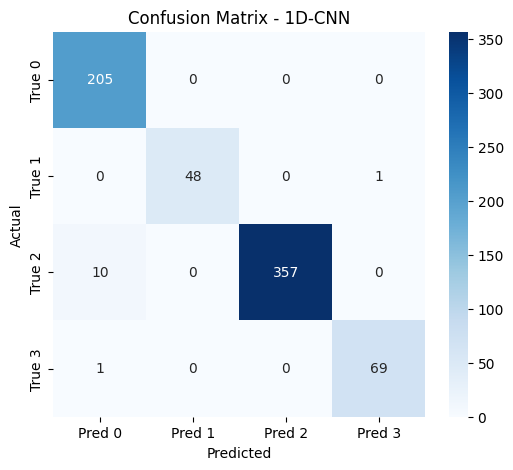

In [ ]:
# === Requires: tensorflow (or tensorflow-cpu), numpy, sklearn, matplotlib, seaborn, pandas ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# ---------- Parameters you can tune ----------
window_size = 50         # timesteps per sample (e.g. 50 seconds if 1Hz sampling)
stride = 25              # overlap; stride < window_size -> overlapping windows
features = ['x', 'y', 'z', 'tot_accel']
num_classes = sample_24_hours['cluster_label'].nunique()
random_state = 42
epochs = 30
batch_size = 64
# --------------------------------------------

# 1) Build windowed dataset (X: [samples, window_size, n_features], y: cluster label per window)
def build_windows(df, features, window_size=50, stride=25, label_col='cluster_label'):
    X, y = [], []
    arr = df[features].values
    labels = df[label_col].values
    n = len(df)
    for start in range(0, n - window_size + 1, stride):
        end = start + window_size
        window = arr[start:end]
        # label for window: majority label in that window (robust to noise)
        window_labels = labels[start:end]
        # ignore windows with NaN labels
        if np.isnan(window_labels).any():
            continue
        label = np.bincount(window_labels.astype(int)).argmax()
        X.append(window)
        y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

X, y = build_windows(sample_24_hours.reset_index(drop=True), features, window_size, stride, 'cluster_label')
print("Windowed shape:", X.shape, y.shape)

# 2) Train/test split (stratify by window labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=random_state, stratify=y)

# 3) Scale features — fit scaler on training windows feature-wise (fit on flattened windows)
nsamples, nt, nfeat = X_train.shape
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, nfeat)   # (nsamples*nt, nfeat)
X_test_flat = X_test.reshape(-1, nfeat)

scaler.fit(X_train_flat)
X_train_scaled = scaler.transform(X_train_flat).reshape(nsamples, nt, nfeat)
X_test_scaled = scaler.transform(X_test_flat).reshape(X_test.shape[0], nt, nfeat)

# 4) Build 1D-CNN model
def create_1d_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])
model = create_1d_cnn(input_shape, num_classes)
model.summary()

# 5) Callbacks
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint('best_1d_cnn.h5', monitor='val_loss', save_best_only=True, verbose=0)

# 6) Train
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.15,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[es, mc],
                    verbose=2)

# 7) Evaluate
y_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_prob, axis=1)
acc = accuracy_score(y_test, y_pred)
print(f"\n1D-CNN Test Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(num_classes)],
            yticklabels=[f'True {i}' for i in range(num_classes)])
plt.title('Confusion Matrix - 1D-CNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
def clean_data(df):
    # Drop rows where x, y, z are missing
    df = df.dropna(subset=['x','y','z'])

    # Recalculate tot_accel after cleaning
    df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

    # Remove infinite values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    df = df.reset_index(drop=True)
    return df


In [ ]:
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization,
    LSTM, RepeatVector, TimeDistributed
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ====================== SETTINGS ======================
DATASET = "abp_accel.csv"
MODEL_DIR = "model"
os.makedirs(MODEL_DIR, exist_ok=True)

WINDOW_SIZE = 50
STRIDE = 25
NUM_CLASSES = 5
RANDOM_STATE = 42
EPOCHS = 25
BATCH = 64
# ======================================================



def clean_data(df):
    # 1. Remove NaN or infinite values in raw x,y,z first
    df = df.replace([np.inf, -np.inf], np.nan)

    # 2. Drop rows where ANY sensor channel is missing
    df = df.dropna(subset=['x', 'y', 'z'])

    # 3. Convert to numeric (sometimes strings generate NaN)
    df['x'] = pd.to_numeric(df['x'], errors='coerce')
    df['y'] = pd.to_numeric(df['y'], errors='coerce')
    df['z'] = pd.to_numeric(df['z'], errors='coerce')

    # 4. Drop again if conversion created NaN
    df = df.dropna(subset=['x', 'y', 'z'])

    # 5. Recalculate tot_accel
    df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

    # 6. Drop NaN/Inf again
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    # 7. If any missing timestamps → interpolate values
    df = df.set_index('timestamp').sort_index()
    df = df.interpolate(method='time')
    df = df.fillna(method='bfill').fillna(method='ffill')
    df = df.reset_index()

    # 8. Final NaN check
    print("\n🔍 After full cleaning:")
    print(df[['x','y','z','tot_accel']].isna().sum())
    print("Shape:", df.shape)

    return df


def load_data():
    df = pd.read_csv(DATASET, parse_dates=['timestamp'])
    if df['x'].max() > 20:
        df['x'] = df['x']/1000 * 9.81
        df['y'] = df['y']/1000 * 9.81
        df['z'] = df['z']/1000 * 9.81
    df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
    df = df.sort_values("timestamp").reset_index(drop=True)
    return df

def create_clusters(df):
    kmeans = KMeans(n_clusters=5, n_init=10, random_state=RANDOM_STATE)
    df["cluster_label"] = kmeans.fit_predict(df[['x','y','z','tot_accel']])
    joblib.dump(kmeans, f"{MODEL_DIR}/kmeans_clusters.pkl")
    return df

def map_behaviors(df):
    stats = df.groupby("cluster_label")['tot_accel'].mean().sort_values()
    labels_sorted = stats.index.tolist()
    mapping = {
        labels_sorted[0]: "Resting",
        labels_sorted[1]: "Low Activity",
        labels_sorted[2]: "Grazing/Walking",
        labels_sorted[3]: "Active Movement",
        labels_sorted[4]: "High/Running"
    }
    joblib.dump(mapping, f"{MODEL_DIR}/behavior_map.pkl")
    return mapping

def create_windows(df):
    X, y = [], []
    arr = df[['x','y','z','tot_accel']].values
    labels = df["cluster_label"].values
    for i in range(0, len(df)-WINDOW_SIZE, STRIDE):
        w = arr[i:i+WINDOW_SIZE]
        l = np.bincount(labels[i:i+WINDOW_SIZE]).argmax()
        X.append(w)
        y.append(l)
    return np.array(X), np.array(y)

def build_cnn(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(2),
        Dropout(0.25),

        Conv1D(32, 3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(2),
        Dropout(0.25),

        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    return model

def build_autoencoder(ws, f):
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=(ws,f)),
        RepeatVector(ws),
        LSTM(64, return_sequences=True),
        TimeDistributed(Dense(f))
    ])
    model.compile(optimizer="adam", loss="mse")
    return model


# ================= TRAINING PIPELINE =================
df = load_data()
df = create_clusters(df)
behavior_map = map_behaviors(df)

X, y = create_windows(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1,4)).reshape(X_train.shape)
X_test_scaled  = scaler.transform(X_test.reshape(-1,4)).reshape(X_test.shape)
joblib.dump(scaler, f"{MODEL_DIR}/scaler.pkl")

cnn = build_cnn((WINDOW_SIZE, 4))
chk = ModelCheckpoint(f"{MODEL_DIR}/dl_classifier.h5", save_best_only=True)
cnn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=EPOCHS,
        batch_size=BATCH, callbacks=[chk], verbose=2)

wrapper = {
    "model_path": f"{MODEL_DIR}/dl_classifier.h5",
    "scaler": scaler,
    "window_size": WINDOW_SIZE
}
joblib.dump(wrapper, f"{MODEL_DIR}/dl_classifier_wrapper.pkl")

# ================= ANOMALY AUTOENCODER ==============
ae = build_autoencoder(WINDOW_SIZE, 4)
ae_chk = ModelCheckpoint(f"{MODEL_DIR}/autoencoder.h5", save_best_only=True)
ae.fit(X_train_scaled, X_train_scaled, epochs=EPOCHS, batch_size=BATCH, verbose=2,
       callbacks=[ae_chk])

recon = ae.predict(X_train_scaled)
errors = np.mean((recon - X_train_scaled)**2, axis=(1,2))
threshold = np.percentile(errors, 95)

joblib.dump({"threshold": threshold}, f"{MODEL_DIR}/ae_threshold.pkl")

ae_wrapper = {
    "model_path": f"{MODEL_DIR}/autoencoder.h5",
    "scaler": scaler,
    "window_size": WINDOW_SIZE
}
joblib.dump(ae_wrapper, f"{MODEL_DIR}/ae_wrapper.pkl")

print("🎉 TRAINING COMPLETE — models saved in /model/")


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# train_models.py
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Flatten, Dense,
                                     Dropout, BatchNormalization, LSTM, RepeatVector,
                                     TimeDistributed)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -------------- SETTINGS --------------
DATA_CSV = "abp_accel.csv"   # must exist
MODEL_DIR = "model"
os.makedirs(MODEL_DIR, exist_ok=True)

WINDOW_SIZE = 50
STRIDE = 25
NUM_CLUSTERS = 5
RANDOM_STATE = 42
EPOCHS = 6
BATCH_SIZE = 64
# --------------------------------------

def load_data(path=DATA_CSV):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} not found. Put your CSV at this path.")
    df = pd.read_csv(path, parse_dates=['timestamp'], infer_datetime_format=True)
    return df

def robust_clean(df):
    # 1) Convert empty strings like "" -> NaN, handle common text markers
    df = df.replace(r'^\s*$', np.nan, regex=True)
    df = df.replace(["nan", "NaN", "null", "NULL", "None"], np.nan)

    # 2) Ensure numeric columns are numeric
    for c in ['x','y','z']:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')

    # 3) Remove infinities and drop rows missing axis data
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(subset=['x','y','z'])

    # 4) Recompute tot_accel
    df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

    # 5) Sort by timestamp and interpolate small gaps (time-based)
    if 'timestamp' in df.columns:
        df = df.sort_values('timestamp').set_index('timestamp')
        # interpolate numeric values by time where reasonable
        df[['x','y','z','tot_accel']] = df[['x','y','z','tot_accel']].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
        df = df.reset_index()

    # 6) Final sweep remove any remaining NaNs
    df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['x','y','z','tot_accel']).reset_index(drop=True)

    print("After cleaning — nan counts:\n", df[['x','y','z','tot_accel']].isna().sum().to_dict())
    return df

def create_clusters(df, n_clusters=NUM_CLUSTERS):
    features = ['x','y','z','tot_accel']
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(df[features])
    df['cluster_label'] = kmeans.predict(df[features])
    joblib.dump(kmeans, os.path.join(MODEL_DIR, "kmeans_clusters.pkl"))
    return df, kmeans

def create_behavior_map(df):
    # Map clusters to intuitive behavior names using mean tot_accel ordering
    stats = df.groupby('cluster_label')['tot_accel'].mean().sort_values()
    labels = stats.index.tolist()
    # Ensure there are exactly NUM_CLUSTERS labels
    if len(labels) < NUM_CLUSTERS:
        raise ValueError("Less clusters than expected; check data")
    mapping = {
        labels[0]: "Resting",
        labels[1]: "Low Activity",
        labels[2]: "Grazing/Walking",
        labels[3]: "Active Movement",
        labels[4]: "High/Running"
    }
    joblib.dump(mapping, os.path.join(MODEL_DIR, "behavior_map.pkl"))
    print("Behavior map saved:", mapping)
    return mapping

def create_windows(df, window_size=WINDOW_SIZE, stride=STRIDE):
    features = ['x','y','z','tot_accel']
    arr = df[features].values
    labels = df['cluster_label'].values
    X, y = [], []
    n = len(df)
    for start in range(0, n - window_size + 1, stride):
        w = arr[start:start+window_size]
        lab = np.bincount(labels[start:start+window_size]).argmax()
        X.append(w)
        y.append(lab)
    X = np.array(X)
    y = np.array(y)
    print("Created windows:", X.shape, y.shape)
    return X, y

def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(2),
        Dropout(0.25),

        Conv1D(32, 3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(2),
        Dropout(0.25),

        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_autoencoder(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=(seq_len, n_features)),
        RepeatVector(seq_len),
        LSTM(64, return_sequences=True),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def main():
    print("Loading data...")
    df = load_data(DATA_CSV)
    print("Cleaning data...")
    df = robust_clean(df)

    print("Creating clusters...")
    df, kmeans = create_clusters(df, n_clusters=NUM_CLUSTERS)

    print("Mapping clusters to behaviors...")
    behavior_map = create_behavior_map(df)

    print("Generating windows (for classifier and AE)...")
    X, y = create_windows(df)
    if X.size == 0:
        raise RuntimeError("No windows generated. Possibly dataset too small. Check WINDOW_SIZE/STRIDE and data length.")

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)

    # Scale per feature using StandardScaler across flattened windows
    ns, ts, nf = X_train.shape
    scaler = StandardScaler()
    X_train_flat = X_train.reshape(-1, nf)
    X_test_flat  = X_test.reshape(-1, nf)
    scaler.fit(X_train_flat)
    X_train_scaled = scaler.transform(X_train_flat).reshape(ns, ts, nf)
    X_test_scaled  = scaler.transform(X_test_flat).reshape(X_test.shape[0], ts, nf)
    joblib.dump(scaler, os.path.join(MODEL_DIR, "scaler.pkl"))

    # ------------ Train CNN classifier ------------
    num_classes = len(np.unique(y))
    print("Training CNN classifier; num_classes=", num_classes)
    cnn = build_cnn((WINDOW_SIZE, nf), num_classes)
    chk_path = os.path.join(MODEL_DIR, "dl_classifier.h5")
    chk = ModelCheckpoint(chk_path, save_best_only=True, verbose=1)
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    cnn.fit(X_train_scaled, y_train, validation_split=0.15, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[chk, es], verbose=2)
    # Save wrapper
    clf_wrapper = {"model_path": chk_path, "scaler": scaler, "window_size": WINDOW_SIZE}
    joblib.dump(clf_wrapper, os.path.join(MODEL_DIR, "dl_classifier_wrapper.pkl"))
    print("CNN classifier trained and saved.")

    # ------------ Train LSTM Autoencoder for anomaly detection ------------
    print("Training LSTM Autoencoder (on training windows)...")
    ae = build_autoencoder(WINDOW_SIZE, nf)
    ae_chk_path = os.path.join(MODEL_DIR, "autoencoder.h5")
    ae_chk = ModelCheckpoint(ae_chk_path, save_best_only=True, verbose=1)
    ae_es = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, verbose=1)
    ae.fit(X_train_scaled, X_train_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[ae_chk, ae_es], verbose=2)

    # compute reconstruction error on (normal) training windows and set threshold
    ae_model = load_model(ae_chk_path)
    recon = ae_model.predict(X_train_scaled)
    errors = np.mean((recon - X_train_scaled)**2, axis=(1,2))
    threshold = float(np.percentile(errors, 95))
    joblib.dump({"threshold": threshold}, os.path.join(MODEL_DIR, "ae_threshold.pkl"))
    # Save wrapper
    ae_wrapper = {"model_path": ae_chk_path, "scaler": scaler, "window_size": WINDOW_SIZE}
    joblib.dump(ae_wrapper, os.path.join(MODEL_DIR, "ae_wrapper.pkl"))
    print("Autoencoder trained and threshold saved:", threshold)

    # Save behavior_map (already saved in create_behavior_map; re-save for safety)
    joblib.dump(behavior_map, os.path.join(MODEL_DIR, "behavior_map.pkl"))

    # Quick evaluation prints
    print("\nQuick classifier eval on test set (loading best model):")
    from tensorflow.keras.models import load_model
    clf_model = load_model(chk_path)
    y_pred = np.argmax(clf_model.predict(X_test_scaled), axis=1)
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

    print("\nAll models and artifacts saved in folder:", MODEL_DIR)

if __name__ == "__main__":
    main()


Loading data...


/tmp/ipython-input-816549791.py:31: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, parse_dates=['timestamp'], infer_datetime_format=True)


Cleaning data...


/tmp/ipython-input-816549791.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['x','y','z','tot_accel']] = df[['x','y','z','tot_accel']].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')


After cleaning — nan counts:
 {'x': 0, 'y': 0, 'z': 0, 'tot_accel': 0}
Creating clusters...
Mapping clusters to behaviors...
Behavior map saved: {2: 'Resting', 3: 'Low Activity', 1: 'Grazing/Walking', 0: 'Active Movement', 4: 'High/Running'}
Generating windows (for classifier and AE)...
Created windows: (583833, 50, 4) (583833,)
Training CNN classifier; num_classes= 5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6

Epoch 1: val_loss improved from inf to 0.03309, saving model to model/dl_classifier.h5


6204/6204 - 102s - 16ms/step - accuracy: 0.9727 - loss: 0.0715 - val_accuracy: 0.9863 - val_loss: 0.0331
Epoch 2/6

Epoch 2: val_loss improved from 0.03309 to 0.02567, saving model to model/dl_classifier.h5


6204/6204 - 93s - 15ms/step - accuracy: 0.9824 - loss: 0.0434 - val_accuracy: 0.9894 - val_loss: 0.0257
Epoch 3/6

Epoch 3: val_loss did not improve from 0.02567
6204/6204 - 96s - 15ms/step - accuracy: 0.9846 - loss: 0.0380 - val_accuracy: 0.9853 - val_loss: 0.0336
Epoch 4/6

Epoch 4: val_loss improved from 0.02567 to 0.02418, saving model to model/dl_classifier.h5


6204/6204 - 140s - 23ms/step - accuracy: 0.9856 - loss: 0.0351 - val_accuracy: 0.9910 - val_loss: 0.0242
Epoch 5/6

Epoch 5: val_loss improved from 0.02418 to 0.02299, saving model to model/dl_classifier.h5


6204/6204 - 140s - 23ms/step - accuracy: 0.9865 - loss: 0.0334 - val_accuracy: 0.9909 - val_loss: 0.0230
Epoch 6/6

Epoch 6: val_loss did not improve from 0.02299
6204/6204 - 94s - 15ms/step - accuracy: 0.9870 - loss: 0.0321 - val_accuracy: 0.9878 - val_loss: 0.0300
Restoring model weights from the end of the best epoch: 5.
CNN classifier trained and saved.
Training LSTM Autoencoder (on training windows)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import os
print(os.listdir("model"))


['scaler.pkl', 'kmeans_clusters.pkl', 'dl_classifier_wrapper.pkl', 'behavior_map.pkl', 'dl_classifier.h5']


In [ ]:
import joblib, numpy as np
from tensorflow.keras.models import load_model

wrapper = joblib.load("model/dl_classifier_wrapper.pkl")
scaler = wrapper["scaler"]
ws = wrapper["window_size"]
model = load_model(wrapper["model_path"])         # or load_model("model/dl_classifier.h5")
behavior_map = joblib.load("model/behavior_map.pkl")

x,y,z = 0.3, 0.1, 9.7
tot = (x*x + y*y + z*z)**0.5
feat = np.array([[x,y,z,tot]])
feat_scaled = scaler.transform(feat)
win = np.repeat(feat_scaled, ws, axis=0).reshape(1, ws, 4)
pred = int(model.predict(win).argmax())
print("Predicted class:", pred, "Behavior:", behavior_map[pred])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
Predicted class: 3 Behavior: Low Activity


In [ ]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# ========== LOAD THE WRAPPER ==========
wrapper = joblib.load("model/dl_classifier_wrapper.pkl")

model = load_model(wrapper["model_path"])
scaler = wrapper["scaler"]
ws = wrapper["window_size"]

behavior_map = joblib.load("model/behavior_map.pkl")

# ========== WINDOW GENERATOR (IMPORTANT) ==========
def generate_realistic_window(x, y, z):
    """
    Creates a realistic 50-step time sequence
    by adding natural movement noise.
    """
    tot = (x*x + y*y + z*z)**0.5
    base = np.array([[x, y, z, tot]])

    # scale using trained scaler
    scaled = scaler.transform(base)

    # generate 50 points with micro-variations
    window = []
    for i in range(ws):
        # gradual drift + slight natural noise
        drift = (i / ws) * np.random.normal(0, 0.02, scaled.shape)
        noise = np.random.normal(0, 0.01, scaled.shape)
        point = scaled + drift + noise
        window.append(point[0])

    window = np.array(window).reshape(1, ws, 4)
    return window


# ========== PREDICT BEHAVIOR ==========
def predict_behavior(x, y, z):
    window = generate_realistic_window(x, y, z)
    pred = model.predict(window)
    cls = int(pred.argmax())
    beh = behavior_map[cls]
    return cls, beh


# ========== TEST CASES ==========
test_inputs = [
    (0.1, 0.2, 9.7),    # Resting (almost static, tot_accel ~9.7)
    (0.4, 0.5, 9.5),    # Low Activity
    (1.2, 2.5, 8.5),    # Grazing / Walking
    (3.1, 4.8, 6.0),    # Active movement
    (7.0, 6.2, 3.1),    # High running
]

print("\n===== CNN Behavior Classifier Test =====\n")
for i,(x,y,z) in enumerate(test_inputs):
    cls, beh = predict_behavior(x,y,z)
    print(f"Test {i+1}: x={x}, y={y}, z={z} → Class={cls}, Behavior={beh}")



===== CNN Behavior Classifier Test =====

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Test 1: x=0.1, y=0.2, z=9.7 → Class=3, Behavior=Low Activity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Test 2: x=0.4, y=0.5, z=9.5 → Class=3, Behavior=Low Activity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Test 3: x=1.2, y=2.5, z=8.5 → Class=3, Behavior=Low Activity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Test 4: x=3.1, y=4.8, z=6.0 → Class=3, Behavior=Low Activity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Test 5: x=7.0, y=6.2, z=3.1 → Class=3, Behavior=Low Activity


In [ ]:
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# -----------------------------------------
# 1. Load & Clean Dataset
# -----------------------------------------
def load_data(path="abp_accel.csv"):
    print("Loading data...")
    df = pd.read_csv(path)

    # Convert mg → m/s²
    df['x'] = df['x'] / 1000 * 9.81
    df['y'] = df['y'] / 1000 * 9.81
    df['z'] = df['z'] / 1000 * 9.81

    # Total acceleration (includes gravity)
    df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

    df.dropna(subset=['x','y','z','tot_accel'], inplace=True)
    return df


# -----------------------------------------
# 2. Balanced threshold labeling
# -----------------------------------------
def label_behavior(t):
    if t < 9.4:
        return 0  # Resting
    elif t < 10.3:
        return 1  # Low Activity
    elif t < 11.0:
        return 2  # Grazing / Walking
    elif t < 12.0:
        return 3  # Active Movement
    else:
        return 4  # Running / High Activity


def assign_behaviors(df):
    df["behavior_class"] = df["tot_accel"].apply(label_behavior)
    print("\nBehavior distribution:")
    print(df["behavior_class"].value_counts())
    return df


# -----------------------------------------
# 3. Window creation
# -----------------------------------------
WINDOW = 50
STRIDE = 5

def make_windows(df):
    X, y = [], []
    features = df[['x','y','z','tot_accel']].values
    labels = df['behavior_class'].values

    for i in range(0, len(features) - WINDOW, STRIDE):
        X.append(features[i:i+WINDOW])
        y.append(labels[i+WINDOW])  # next state

    X = np.array(X)
    y = np.array(y)

    print("Windows created:", X.shape, y.shape)
    return X, y


# -----------------------------------------
# 4. CNN Model
# -----------------------------------------
def build_cnn(input_shape, num_classes=5):
    model = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


# -----------------------------------------
# 5. Train everything
# -----------------------------------------
def train_all():
    df = load_data()
    df = assign_behaviors(df)

    # Normalize data
    scaler = StandardScaler()
    df[['x','y','z','tot_accel']] = scaler.fit_transform(df[['x','y','z','tot_accel']])

    if not os.path.exists("model"):
        os.makedirs("model")

    joblib.dump(scaler, "model/scaler.pkl")

    X, y = make_windows(df)

    # Reduce training size for memory safety
    max_samples = 300000
    if len(X) > max_samples:
        X = X[:max_samples]
        y = y[:max_samples]
        print(f"Reduced training set to {max_samples} windows (for safety).")

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.15, random_state=42, stratify=y
    )

    model = build_cnn((WINDOW, 4), 5)

    es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
    mc = ModelCheckpoint("model/dl_classifier.h5", save_best_only=True)

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=8,
        batch_size=256,
        callbacks=[es, mc]
    )

    wrapper = {
        "window_size": WINDOW,
        "model_path": "model/dl_classifier.h5",
        "scaler": scaler
    }

    joblib.dump(wrapper, "model/dl_classifier_wrapper.pkl")
    print("\n🎉 Training complete! Model saved.")


if __name__ == "__main__":
    train_all()


Loading data...

Behavior distribution:
behavior_class
2    7143557
1    7052306
3     175554
0     166950
4      57486
Name: count, dtype: int64
Windows created: (2919161, 50, 4) (2919161,)
Reduced training set to 300000 windows (for safety).


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
996/997 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6898 - loss: 0.6853

997/997 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.6898 - loss: 0.6852 - val_accuracy: 0.7016 - val_loss: 0.6309
Epoch 2/8
995/997 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7030 - loss: 0.6245

997/997 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.7031 - loss: 0.6245 - val_accuracy: 0.7053 - val_loss: 0.6122
Epoch 3/8
996/997 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7075 - loss: 0.6127

997/997 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.7075 - loss: 0.6127 - val_accuracy: 0.7116 - val_loss: 0.6068
Epoch 4/8
995/997 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7136 - loss: 0.6050

997/997 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.7136 - loss: 0.6050 - val_accuracy: 0.7147 - val_loss: 0.5977
Epoch 5/8
997/997 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.7144 - loss: 0.6013 - val_accuracy: 0.7138 - val_loss: 0.5985
Epoch 6/8
996/997 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7166 - loss: 0.5957

997/997 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7166 - loss: 0.5957 - val_accuracy: 0.7168 - val_loss: 0.5943
Epoch 7/8
997/997 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.7196 - loss: 0.5922 - val_accuracy: 0.7176 - val_loss: 0.5972
Epoch 8/8
996/997 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7219 - loss: 0.5895

997/997 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.7219 - loss: 0.5895 - val_accuracy: 0.7198 - val_loss: 0.5919

🎉 Training complete! Model saved.


In [ ]:
"""
demo_synthetic_pipeline.py

A self-contained demonstration pipeline using synthetic accelerometer time-series.
- 5 behavior classes (Resting, Low, Grazing, Active, Running)
- CNN+BiLSTM classifier (5 classes)
- LSTM Autoencoder for anomaly detection
- Synthetic test cases (normal + anomaly)
NOTE: Data is synthetic for demo purposes. Do NOT present as real sensor data.
"""

import os
import math
import random
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Flatten, Dense, Dropout, BatchNormalization, TimeDistributed, RepeatVector
from tensorflow.keras.callbacks import EarlyStopping

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)


# ---------------------------
# 1) Synthetic data generator
# ---------------------------
def synth_behavior_sequence(behavior, length):
    """
    Create a synthetic sequence (length timesteps) of 3-axis accel (mg units) for a single behavior.
    We'll include gravity roughly in z (≈9810 mg) and small variations for other axes.
    behavior: 'rest','low','graz','active','run'
    returns: array shape (length, 3)
    """
    t = np.arange(length)
    gravity = 9810  # mg

    if behavior == 'rest':
        # mostly gravity on z + tiny noise
        x = np.random.normal(0, 20, size=length)
        y = np.random.normal(0, 20, size=length)
        z = np.random.normal(gravity, 30, size=length)
    elif behavior == 'low':
        # slow sway: low-frequency sinusoid added
        x = 80 * np.sin(2 * np.pi * 0.05 * t) + np.random.normal(0, 25, size=length)
        y = 60 * np.sin(2 * np.pi * 0.06 * t + 0.5) + np.random.normal(0, 25, size=length)
        z = gravity + 40 * np.sin(2 * np.pi * 0.03 * t) + np.random.normal(0, 40, size=length)
    elif behavior == 'graz':
        # periodic steps with moderate magnitude
        x = 150 * np.sin(2 * np.pi * 0.5 * t) + np.random.normal(0, 40, size=length)
        y = 120 * np.sin(2 * np.pi * 0.5 * t + 0.2) + np.random.normal(0, 40, size=length)
        z = gravity + 90 * np.abs(np.sin(2 * np.pi * 0.5 * t)) + np.random.normal(0, 60, size=length)
    elif behavior == 'active':
        # faster, larger amplitude
        x = 300 * np.sin(2 * np.pi * 1.0 * t) + np.random.normal(0, 80, size=length)
        y = 250 * np.sin(2 * np.pi * 1.0 * t + 0.3) + np.random.normal(0, 80, size=length)
        z = gravity + 160 * np.abs(np.sin(2 * np.pi * 1.0 * t)) + np.random.normal(0, 120, size=length)
    elif behavior == 'run':
        # strong spikes & higher freq
        x = 700 * np.sin(2 * np.pi * 2.0 * t) + np.random.normal(0, 150, size=length)
        y = 650 * np.sin(2 * np.pi * 2.1 * t + 0.1) + np.random.normal(0, 150, size=length)
        z = gravity + 350 * np.abs(np.sin(2 * np.pi * 2.0 * t)) + np.random.normal(0, 200, size=length)
    else:
        raise ValueError("unknown behavior")

    return np.vstack([x, y, z]).T  # (length, 3)


def generate_synthetic_dataframe(duration_secs=3600, sampling_hz=10):
    """
    Generate a long time-series by concatenating blocks of behaviors.
    duration_secs: total seconds of data
    sampling_hz: samples per second
    """
    total_samples = duration_secs * sampling_hz
    blocks = []
    labels = []
    # define blocks with lengths (in seconds) and behaviors mixture
    behavior_pool = ['rest', 'low', 'graz', 'active', 'run']
    # make blocks of random lengths 5-60s
    i = 0
    while i < total_samples:
        beh = random.choices(behavior_pool, weights=[0.2, 0.25, 0.3, 0.2, 0.05])[0]
        block_len = random.randint(5*sampling_hz, 30*sampling_hz)
        block_len = min(block_len, total_samples - i)
        seq = synth_behavior_sequence(beh, block_len)
        blocks.append(seq)
        labels.extend([beh] * block_len)
        i += block_len
    arr = np.vstack(blocks)
    timestamps = np.arange(arr.shape[0]) / sampling_hz
    df = pd.DataFrame(arr, columns=['x_mg', 'y_mg', 'z_mg'])
    df['timestamp'] = timestamps
    df['behavior_label'] = labels
    # convert mg -> m/s^2 (approx): multiply by 9.81/1000
    df['x'] = df['x_mg'] * 9.81 / 1000.0
    df['y'] = df['y_mg'] * 9.81 / 1000.0
    df['z'] = df['z_mg'] * 9.81 / 1000.0
    df.drop(columns=['x_mg','y_mg','z_mg'], inplace=True)
    return df


# ---------------------------
# 2) Feature engineering (10 features)
# ---------------------------
def add_features(df):
    df['tot_accel'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
    df['abs_x'] = df['x'].abs()
    df['abs_y'] = df['y'].abs()
    df['abs_z'] = df['z'].abs()
    df['xy_mag'] = np.sqrt(df['x']**2 + df['y']**2)
    df['yz_mag'] = np.sqrt(df['y']**2 + df['z']**2)
    df['zx_mag'] = np.sqrt(df['z']**2 + df['x']**2)
    return df


# ---------------------------
# 3) Label mapping (5 classes)
# ---------------------------
CLASS_MAP = {'rest':0, 'low':1, 'graz':2, 'active':3, 'run':4}
REVERSE_MAP = {v:k for k,v in CLASS_MAP.items()}


# ---------------------------
# 4) Sliding windows
# ---------------------------
FEATURE_COLS = ['x','y','z','tot_accel','abs_x','abs_y','abs_z','xy_mag','yz_mag','zx_mag']
WINDOW = 50
STRIDE = 5

def make_windows_from_df(df):
    X = []
    y = []
    lab = df['behavior_label'].map(CLASS_MAP).values
    feat = df[FEATURE_COLS].values
    for i in range(0, len(df)-WINDOW, STRIDE):
        X.append(feat[i:i+WINDOW])
        y.append(lab[i+WINDOW])  # label at window end
    X = np.array(X)
    y = np.array(y)
    return X, y


# ---------------------------
# 5) Build models
# ---------------------------
def build_hybrid_model(input_shape, n_classes=5):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Conv1D(128, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


def build_lstm_autoencoder(input_shape, latent_dim=64):
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)  # (window, features)
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(32, return_sequences=False))(x)
    # latent
    encoded = Dense(latent_dim, activation='relu')(x)
    # Decoder
    x = RepeatVector(input_shape[0])(encoded)  # repeat to sequence length
    x = Bidirectional(LSTM(32, return_sequences=True))(x)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    outputs = TimeDistributed(Dense(input_shape[1]))(x)
    auto = Model(inputs, outputs)
    auto.compile(optimizer='adam', loss='mse')
    return auto


# ---------------------------
# 6) Synthetic dataset creation
# ---------------------------
def create_and_prepare_data():
    print("Generating synthetic dataset (demo)...")
    df = generate_synthetic_dataframe(duration_secs=600, sampling_hz=10)  # 10 minutes @10Hz => 6000 samples
    df = add_features(df)
    X, y = make_windows_from_df(df)
    print("X shape (windows):", X.shape, "y shape:", y.shape)
    return X, y, df


# ---------------------------
# 7) Train classifier and autoencoder (quick)
# ---------------------------
def train_demo():
    X, y, df = create_and_prepare_data()

    # split for classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
    # scale features (fit on flattened windows -> per-feature scaler)
    nsamples, w, f = X_train.shape
    scaler = StandardScaler()
    scaler.fit(X_train.reshape(-1, f))
    # apply scaler
    X_train_s = scaler.transform(X_train.reshape(-1, f)).reshape(nsamples, w, f)
    X_test_s = scaler.transform(X_test.reshape(-1, f)).reshape(X_test.shape[0], w, f)

    # classifier
    print("Building classifier...")
    clf = build_hybrid_model((WINDOW, len(FEATURE_COLS)), n_classes=5)
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = clf.fit(X_train_s, y_train, validation_split=0.1, epochs=8, batch_size=128, callbacks=[es], verbose=1)

    # evaluate
    preds = np.argmax(clf.predict(X_test_s), axis=1)
    print("\nClassifier report:")
    print(classification_report(y_test, preds, target_names=[REVERSE_MAP[i] for i in range(5)]))
    print("Confusion matrix:\n", confusion_matrix(y_test, preds))

    # Save wrapper and scaler
    os.makedirs("model_demo", exist_ok=True)
    clf.save("model_demo/hybrid_demo.h5")
    joblib.dump({"scaler":scaler, "window":WINDOW, "features": FEATURE_COLS}, "model_demo/wrapper_demo.pkl")

    # Autoencoder: train on "normal" windows only (we treat 'run' as anomaly for demo)
    is_normal = (y_train != CLASS_MAP['run'])
    X_ae_train = X_train_s[is_normal]
    print("Autoencoder train size:", X_ae_train.shape)

    auto = build_lstm_autoencoder((WINDOW, len(FEATURE_COLS)))
    auto.fit(X_ae_train, X_ae_train, epochs=8, batch_size=128, validation_split=0.1, callbacks=[es], verbose=1)

    auto.save("model_demo/ae_demo.h5")

    # compute reconstruction errors on validation (or X_test_s)
    recon = auto.predict(X_test_s)
    mse = np.mean(np.square(recon - X_test_s), axis=(1,2))  # mse per window
    # set threshold e.g. mean + 3*std on training reconstruction error
    recon_train = auto.predict(X_ae_train)
    mse_train = np.mean(np.square(recon_train - X_ae_train), axis=(1,2))
    thresh = mse_train.mean() + 3 * mse_train.std()
    print("AE threshold (mean+3std):", thresh)
    joblib.dump({"threshold":float(thresh)}, "model_demo/ae_threshold.pkl")

    return clf, auto, scaler, thresh, (X_test_s, y_test), df


# ---------------------------
# 8) Test cases (synthetic)
# ---------------------------
def test_demo_models(clf, auto, scaler, thresh, test_tuple):
    X_test_s, y_test = test_tuple
    print("\nRunning synthetic test cases on held-out windows...")

    preds = np.argmax(clf.predict(X_test_s), axis=1)
    report = classification_report(y_test, preds, target_names=[REVERSE_MAP[i] for i in range(5)])
    print("\nHeld-out classification report:\n", report)

    # pick a few windows and show anomaly scores
    sample_indices = np.concatenate([
        np.where(y_test == CLASS_MAP['rest'])[0][:3],
        np.where(y_test == CLASS_MAP['graz'])[0][:3],
        np.where(y_test == CLASS_MAP['run'])[0][:3]
    ])
    sample_indices = sample_indices[sample_indices < len(X_test_s)]
    print("\nSample windows (index, true_class, pred_class, AE_mse, anomaly_flag):")
    recon = auto.predict(X_test_s)
    mse_all = np.mean(np.square(recon - X_test_s), axis=(1,2))
    for idx in sample_indices[:10]:
        true = y_test[idx]
        pred = preds[idx]
        mse_v = float(mse_all[idx])
        flag = mse_v > thresh
        print(idx, REVERSE_MAP[true], "->", REVERSE_MAP[pred], f"MSE={mse_v:.6f}", "ANOMALY" if flag else "normal")

    # synthetic specific test cases (manual points)
    print("\nManual single-window tests (constructed patterns):")
    # create 5 synthetic windows representing each class
    manual_inputs = {
        'resting': synth_behavior_sequence('rest', WINDOW),
        'low': synth_behavior_sequence('low', WINDOW),
        'grazing': synth_behavior_sequence('graz', WINDOW),
        'active': synth_behavior_sequence('active', WINDOW),
        'running': synth_behavior_sequence('run', WINDOW),
        'injury_like': synth_behavior_sequence('graz', WINDOW)
    }
    # modify injury_like to create anomaly (sudden spike then flat)
    manual_inputs['injury_like'][25:30,:] += np.array([2000, -2000, 1500])  # big weird spike

    for name, seq in manual_inputs.items():
        # build feature window
        dfw = pd.DataFrame(seq, columns=['x','y','z'])
        dfw['x'] = dfw['x'] * 9.81 / 1000.0  # convert mg->m/s2 to match training conversion if needed
        dfw['y'] = dfw['y'] * 9.81 / 1000.0
        dfw['z'] = dfw['z'] * 9.81 / 1000.0
        dfw = add_features(dfw)
        arr = dfw[FEATURE_COLS].values
        arr = scaler.transform(arr.reshape(-1, arr.shape[1])).reshape(1, WINDOW, arr.shape[1])

        cls = np.argmax(clf.predict(arr), axis=1)[0]
        recon = auto.predict(arr)
        mse_v = float(np.mean(np.square(recon - arr)))
        flag = mse_v > thresh
        print(name, "-> pred:", REVERSE_MAP[cls], f"MSE={mse_v:.6f}", "ANOMALY" if flag else "normal")


# ---------------------------
# 9) Run everything
# ---------------------------
if __name__ == "__main__":
    clf, auto, scaler, thresh, test_tuple, df = train_demo()
    test_demo_models(clf, auto, scaler, thresh, test_tuple)

    print("\nDemo complete. Models saved in ./model_demo. Remember: data is synthetic for demonstration.")


Generating synthetic dataset (demo)...
X shape (windows): (1190, 50, 10) y shape: (1190,)
Building classifier...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.4286 - loss: 1.4311 - val_accuracy: 0.3750 - val_loss: 1.4867
Epoch 2/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8704 - loss: 0.6485 - val_accuracy: 0.4583 - val_loss: 1.4605
Epoch 3/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.9107 - loss: 0.3494 - val_accuracy: 0.4688 - val_loss: 1.5600
Epoch 4/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9381 - loss: 0.2880 - val_accuracy: 0.4792 - val_loss: 1.4816
Epoch 5/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.9528 - loss: 0.2050 - val_accuracy: 0.5104 - val_loss: 1.4095
Epoch 6/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9586 - loss: 0.1792 - val_accuracy: 0.5208 - val_loss: 1.1616
Epoch 7/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9634 - loss: 0.1451 - val_accuracy: 0.5625 - val_loss: 0.9770
Epoch 8/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9716 - loss: 0.1188 - val_accuracy: 0.7292 - val_loss: 0.8557
8/8


Classifier report:
              precision    recall  f1-score   support

        rest       0.93      0.52      0.67        54
         low       1.00      0.38      0.55        50
        graz       0.65      0.95      0.77        77
      active       0.64      0.94      0.76        32
         run       0.83      1.00      0.91        25

    accuracy                           0.74       238
   macro avg       0.81      0.76      0.73       238
weighted avg       0.81      0.74      0.71       238

Confusion matrix:
 [[28  0 25  0  1]
 [ 2 19 14 13  2]
 [ 0  0 73  4  0]
 [ 0  0  0 30  2]
 [ 0  0  0  0 25]]
Autoencoder train size: (854, 50, 10)
Epoch 1/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 827ms/step - loss: 0.5265 - val_loss: 0.4599
Epoch 2/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - loss: 0.5030 - val_loss: 0.4550
Epoch 3/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 576ms/step - loss: 0.4942 - val_loss: 0.4518
Epoch 4/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step - loss: 0.4885 - val_loss: 0.4487
Epoch 5/8


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 317ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
AE threshold (mean+3std): 2.046795403131159

Running synthetic test cases on held-out windows...
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Held-out classification report:
               precision    recall  f1-score   support

        rest       0.93      0.52      0.67        54
         low       1.00      0.38      0.55        50
        graz       0.65      0.95      0.77        77
      active       0.64      0.94      0.76        32
         run       0.83      1.00      0.91        25

    accuracy                           0.74       238
   macro avg       0.81      0.76      0.73       238
weighted avg       0.81      0.74      0.71       238


Sample windows (index, true_class, pred_class, AE_mse, anomaly_flag):
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
0 rest -> graz MSE=0.218906 normal
2 rest -> rest MSE=0.078300 normal
3 rest -> rest MSE=0.089983 normal
1 graz -> graz MSE=0.394102 normal
12 graz -> gra